### importing important libraries and load data
We start by importing the necessary Python libraries for data manipulation and visualization. Then, we download the dataset directly from Kaggle.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-analytics-dataset/Cleaned_HR_Data_Analysis.csv
/kaggle/input/hr-analytics-dataset/Messy_HR_Dataset_Detailed.csv


### Read data
Reading the dataset and taking a first look at the structure, column names

In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics-dataset/Cleaned_HR_Data_Analysis.csv')
df.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


### Quick look
We examine the summary statistics for numerical and categorical columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc                    2845 

In [4]:
df.columns

Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')

In [5]:
df.describe()

,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,2.974692,2.941652,3.028471,2.989104,2.973989,559.278956,49.448506
std,859.450107,1.012610,1.435230,1.410067,1.408816,1.419682,263.333611,17.689179
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.040000,17.000000
25%,1736.000000,2.000000,2.000000,2.000000,2.000000,2.000000,328.060000,34.000000
50%,2456.000000,3.000000,3.000000,3.000000,3.000000,3.000000,571.810000,49.000000
75%,3197.000000,3.000000,4.000000,4.000000,4.000000,4.000000,788.330000,65.000000
max,4000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,999.970000,82.000000


In [6]:
df.describe(include='O')

,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Survey Date,Training Date,Training Program Name,Training Type,Training Outcome
count,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845
unique,1472,32,10,2,3,3,3,6,25,2664,28,2,5,4,4,366,366,5,2,4
top,04-Mar-22,Production Technician I,NEL,Active,Full-Time,Zone A,Temporary,Production,Field Operations,25-12-1991,MA,Female,Asian,Single,Fully Meets,14-12-2022,08-May-23,Communication Skills,External,Completed
freq,7,1241,291,2458,997,1013,980,1910,747,4,2523,1588,598,731,2251,16,14,633,1424,737


### Data Cleaning
Data quality is crucial. Here, we check for:
* **Missing Values:** To ensure completeness.
* **Duplicate Records:** To ensure data uniqueness.

### Checking Missing Values

In [7]:
df.isnull().sum()

Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64

### Checking Duplicate Values

In [8]:
df.duplicated().sum()

np.int64(0)

### Feature Engineering & Formatting
* **Date Conversion:** Converting columns like `StartDate`, `DOB`, and `Survey Date` to datetime objects for accurate analysis.
* **New Features:** Extracting the **Year of Employment** to analyze hiring trends over time.

In [9]:
df.rename(columns={"DOB":"Date of Birth"},inplace=True)

In [10]:
df['StartDate']=pd.to_datetime(df['StartDate'],format='mixed')
df['Year of employment']=df['StartDate'].dt.year
df['Date of Birth']=pd.to_datetime(df['Date of Birth'],format='mixed')
df['Year of Birth']=df['Date of Birth'].dt.year
df['Survey Date']=pd.to_datetime(df['Survey Date'],format='mixed')
df['Training Date']=pd.to_datetime(df['Training Date'],format='mixed')

### Univariate Analysis
Analyzing individual variables to understand their distributions.

In [11]:
df['Year of employment'].unique()

array([2019, 2023, 2018, 2021, 2020, 2022], dtype=int32)

In [12]:
df['Year of employment'].nunique()

6

In [13]:
df['Year of employment'].value_counts() # we can see Increase in the number of employees in 2022


Year of employment
2022    594
2021    564
2020    560
2019    560
2023    319
2018    248
Name: count, dtype: int64

In [14]:
df['StartDate'].max() # 2023 appears low likely because the data collection cut off mid-year

Timestamp('2023-08-06 00:00:00')

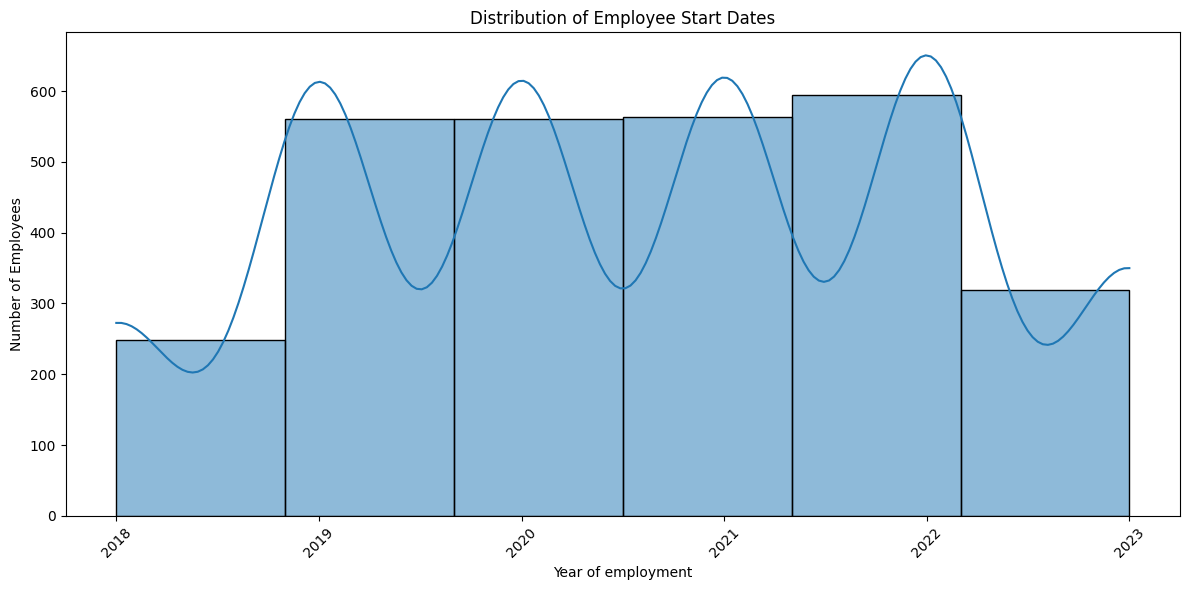

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year of employment', bins=6, kde=True)
plt.title('Distribution of Employee Start Dates')
plt.xlabel('Year of employment')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

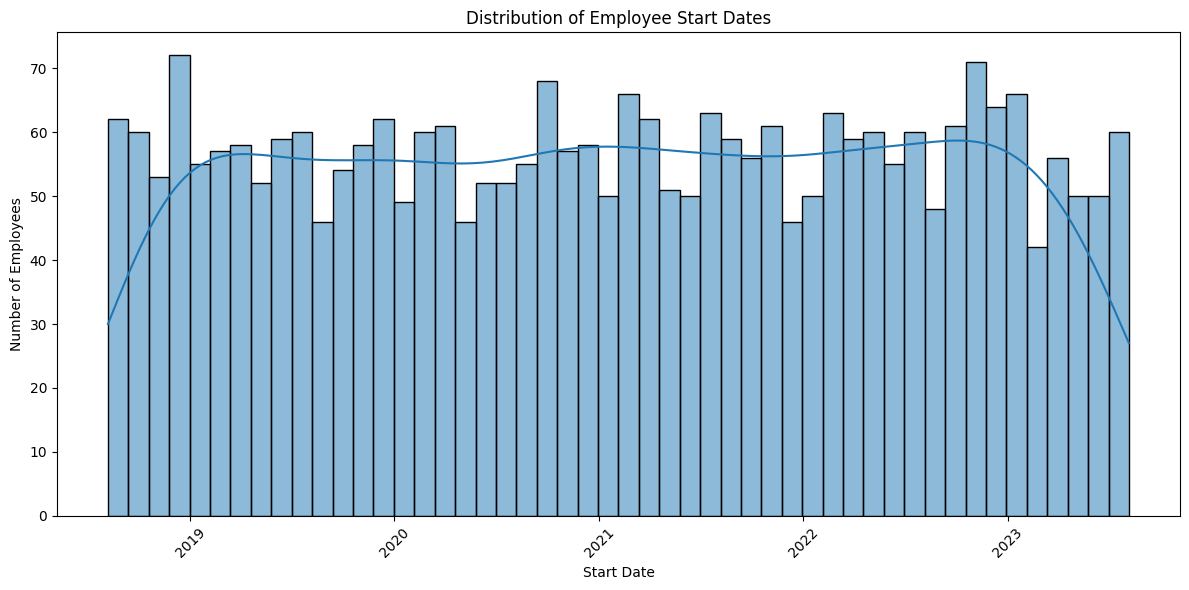

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='StartDate', bins=50, kde=True)
plt.title('Distribution of Employee Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df['Title'].unique() #we can see there are Two values for Same position Data analyst  (Data entery error)

array(['Production Technician I', 'Area Sales Manager',
       'Production Technician II', 'IT Support', 'Network Engineer',
       'Sr. Network Engineer', 'Principal Data Architect',
       'Enterprise Architect', 'Database Administrator', 'Data Analyst',
       'Sr. DBA', 'Data Analyst ', 'Data Architect', 'CIO', 'BI Director',
       'Sr. Accountant', 'Software Engineering Manager',
       'Software Engineer', 'Shared Services Manager',
       'Senior BI Developer', 'Production Manager', 'President & CEO',
       'Administrative Assistant', 'Accountant I', 'BI Developer',
       'Sales Manager', 'IT Manager - Support', 'IT Manager - Infra',
       'IT Manager - DB', 'Director of Sales', 'Director of Operations',
       'IT Director'], dtype=object)

In [18]:
df['Title'] = df['Title'].str.replace('Data Analyst ', 'Data Analyst', regex=False)

In [19]:
df['Title'].nunique()

31

In [20]:
df['Title'].value_counts()[:5] # we can see The largest segment of the company's employees are Production Technician I 

Title
Production Technician I     1241
Production Technician II     486
Area Sales Manager           277
Production Manager           154
Software Engineer             89
Name: count, dtype: int64

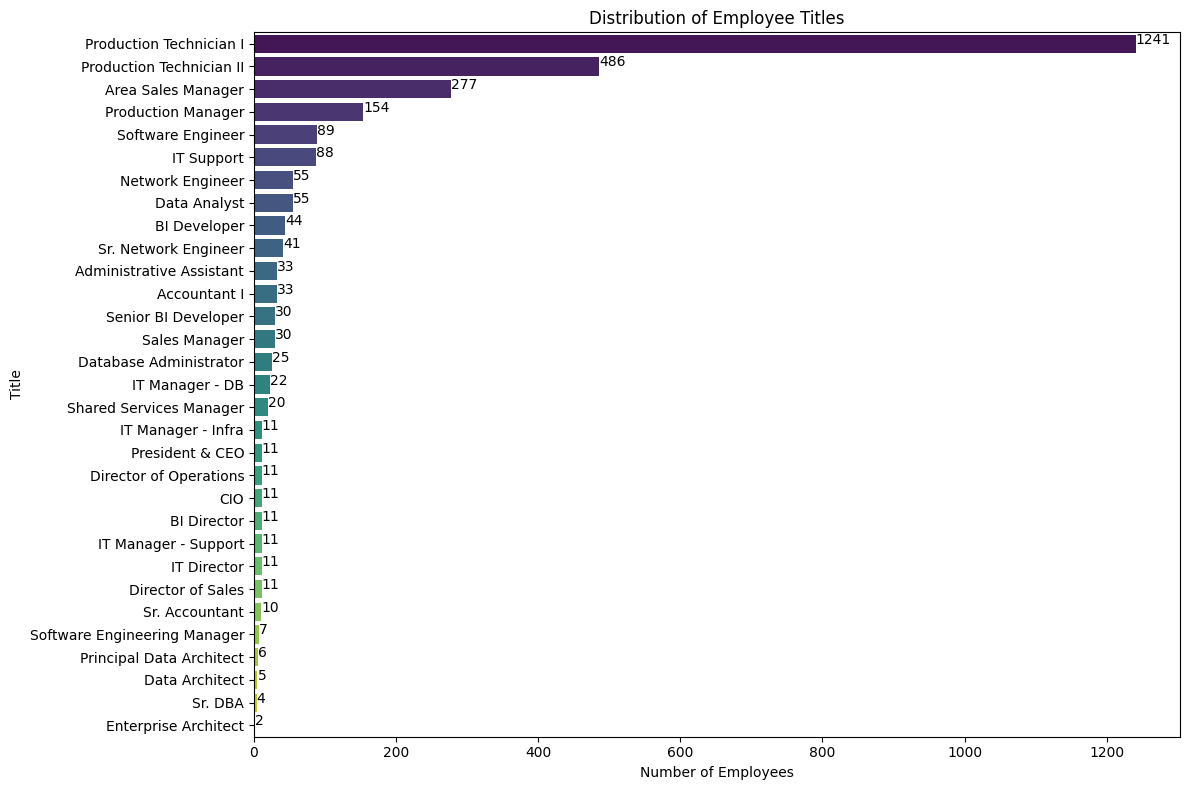

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Title', order=df['Title'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Titles')
plt.xlabel('Number of Employees')
plt.ylabel('Title')
for index, value in enumerate(df['Title'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [22]:
df['BusinessUnit'].unique()

array(['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC',
       'PYZ'], dtype=object)

In [23]:
df['BusinessUnit'].nunique()

10

In [24]:
df['BusinessUnit'].value_counts()[:5]#The largest segment of the company's employees work in NEL unit

BusinessUnit
NEL     291
BPC     288
WBL     286
PYZ     285
CCDR    284
Name: count, dtype: int64

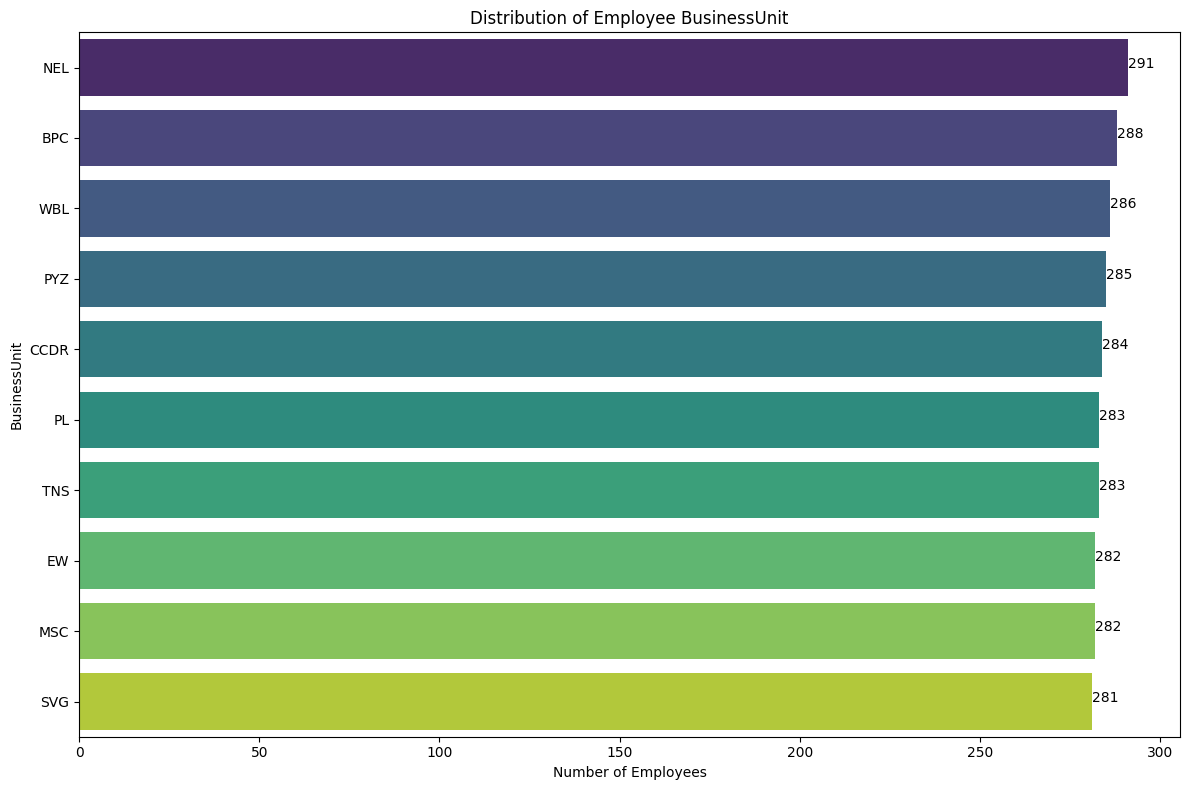

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='BusinessUnit', order=df['BusinessUnit'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee BusinessUnit')
plt.xlabel('Number of Employees')
plt.ylabel('BusinessUnit')
for index, value in enumerate(df['BusinessUnit'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [26]:
df['EmployeeStatus'].unique()

array(['Active', 'Terminated'], dtype=object)

In [27]:
df['EmployeeStatus'].value_counts() #we have 2458 Active Employee from 2845

EmployeeStatus
Active        2458
Terminated     387
Name: count, dtype: int64

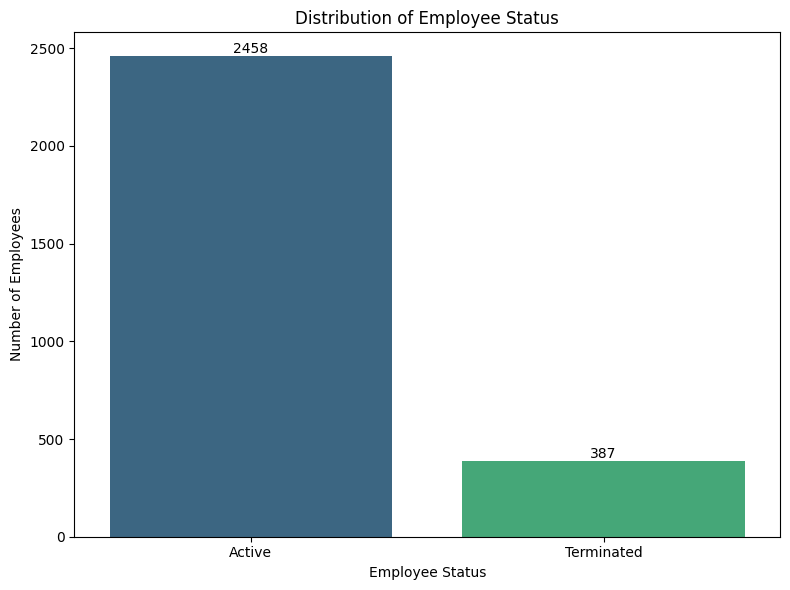

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EmployeeStatus', order=df['EmployeeStatus'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['EmployeeStatus'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [29]:
df['EmployeeType'].unique()

array(['Contract', 'Full-Time', 'Part-Time'], dtype=object)

In [30]:
df['EmployeeType'].value_counts() # HR Contract Type

EmployeeType
Full-Time    997
Contract     951
Part-Time    897
Name: count, dtype: int64

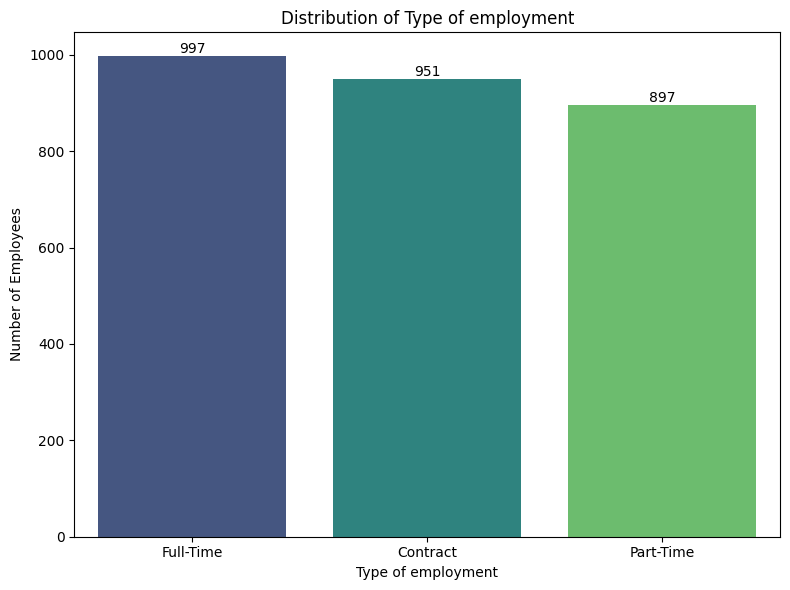

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EmployeeType', order=df['EmployeeType'].value_counts().index, palette='viridis')
plt.title('Distribution of Type of employment')
plt.xlabel('Type of employment')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['EmployeeType'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
df['PayZone'].unique()

array(['Zone C', 'Zone A', 'Zone B'], dtype=object)

In [33]:
df['PayZone'].value_counts()

PayZone
Zone A    1013
Zone B     934
Zone C     898
Name: count, dtype: int64

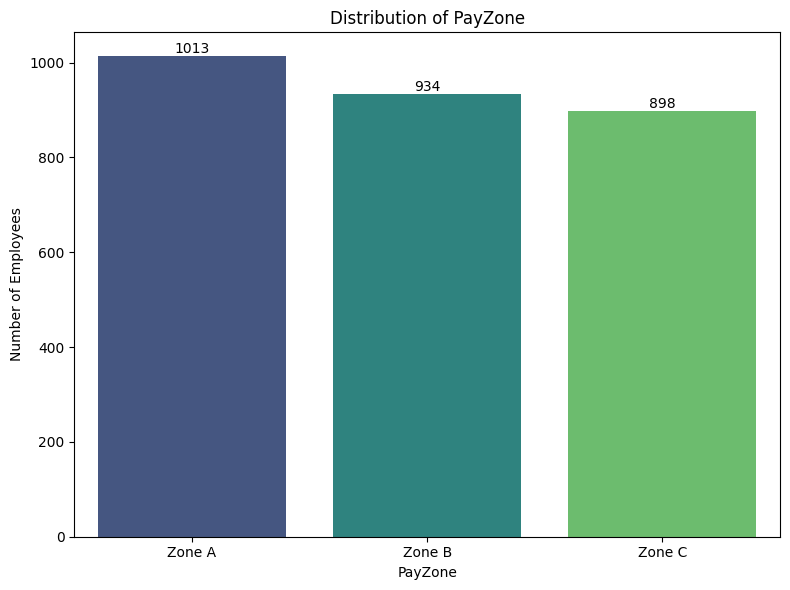

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PayZone', order=df['PayZone'].value_counts().index, palette='viridis')
plt.title('Distribution of PayZone')
plt.xlabel('PayZone')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['PayZone'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [35]:
df['EmployeeClassificationType'].unique() #  lets say its based on Payroll

array(['Temporary', 'Part-Time', 'Full-Time'], dtype=object)

In [36]:
df['EmployeeClassificationType'].value_counts() # Temporary is the highest segment

EmployeeClassificationType
Temporary    980
Full-Time    966
Part-Time    899
Name: count, dtype: int64

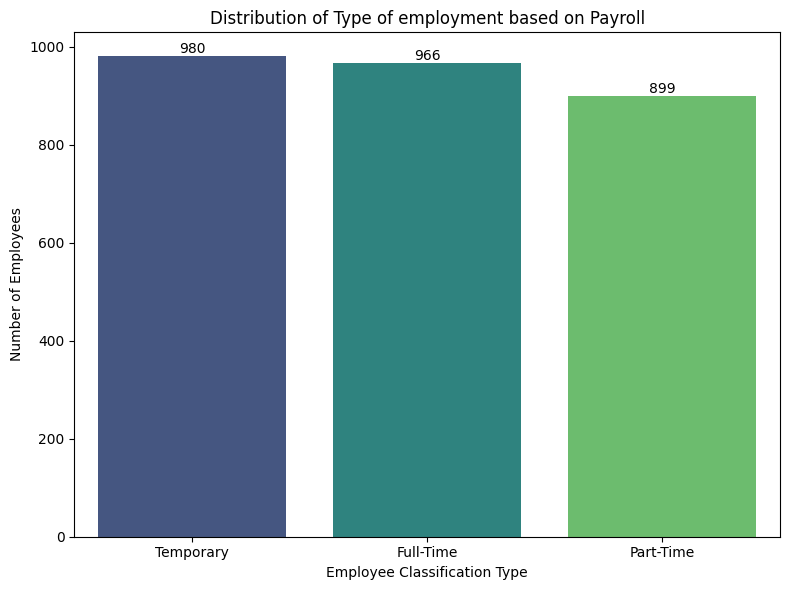

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EmployeeClassificationType', order=df['EmployeeClassificationType'].value_counts().index, palette='viridis')
plt.title('Distribution of Type of employment based on Payroll')
plt.xlabel('Employee Classification Type')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['EmployeeClassificationType'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [38]:
df['DepartmentType'].unique() # we have 6 Departments

array(['Production       ', 'Sales', 'IT/IS', 'Executive Office',
       'Software Engineering', 'Admin Offices'], dtype=object)

In [39]:
df['DepartmentType'].value_counts() #The department with the highest number of employees is Production

DepartmentType
Production              1910
IT/IS                    409
Sales                    311
Software Engineering     112
Admin Offices             79
Executive Office          24
Name: count, dtype: int64

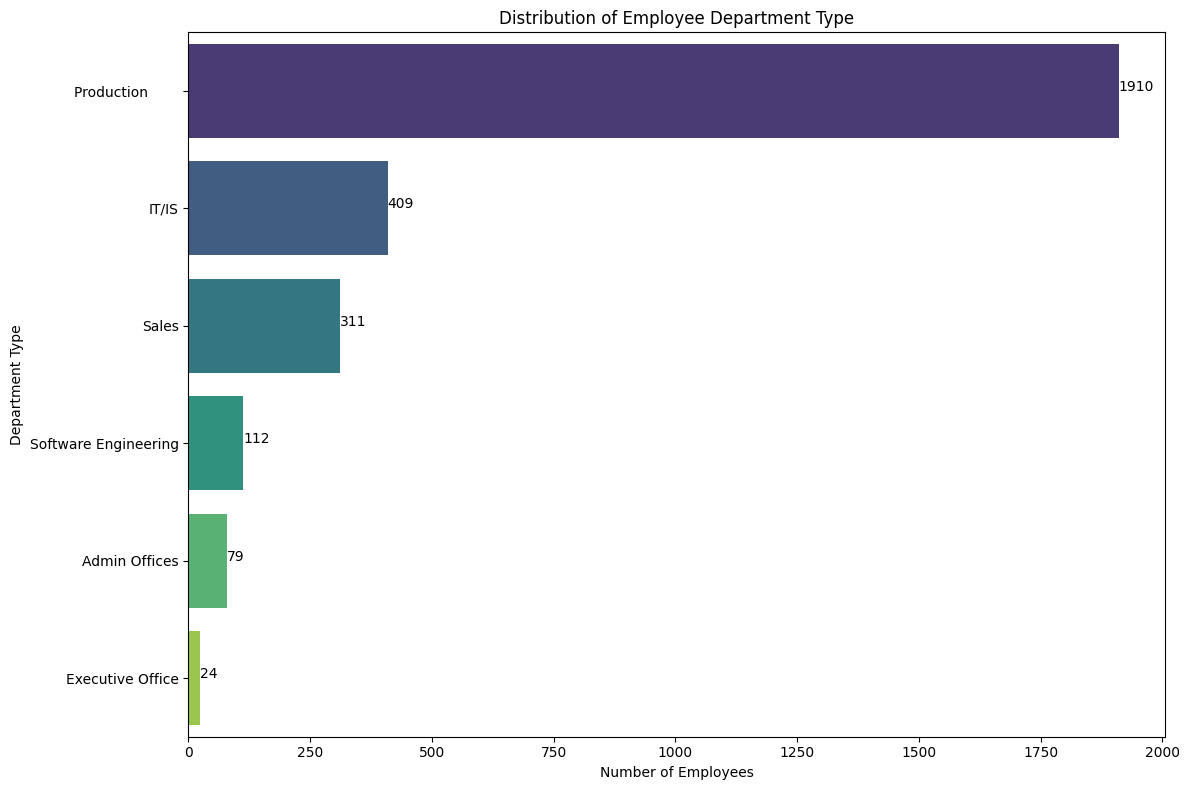

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='DepartmentType', order=df['DepartmentType'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Department Type')
plt.xlabel('Number of Employees')
plt.ylabel('Department Type')
for index, value in enumerate(df['DepartmentType'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [41]:
df['Division'].unique()

array(['Finance & Accounting', 'Aerial', 'General - Sga', 'General - Con',
       'Field Operations', 'General - Eng', 'Engineers', 'Executive',
       'Splicing', 'Project Management - Con', 'Fielders',
       'Project Management - Eng', 'Shop (Fleet)',
       'Wireline Construction', 'Catv', 'Wireless', 'People Services',
       'Yard (Material Handling)', 'Billable Consultants',
       'Technology / It', 'Underground', 'Sales & Marketing', 'Isp',
       'Safety', 'Corp Operations'], dtype=object)

In [42]:
df['Division'].nunique()

25

In [43]:
df['Division'].value_counts()[:5] #The Division with the highest number of employees is Field Operations

Division
Field Operations         747
General - Con            474
Engineers                261
Aerial                   181
Wireline Construction    175
Name: count, dtype: int64

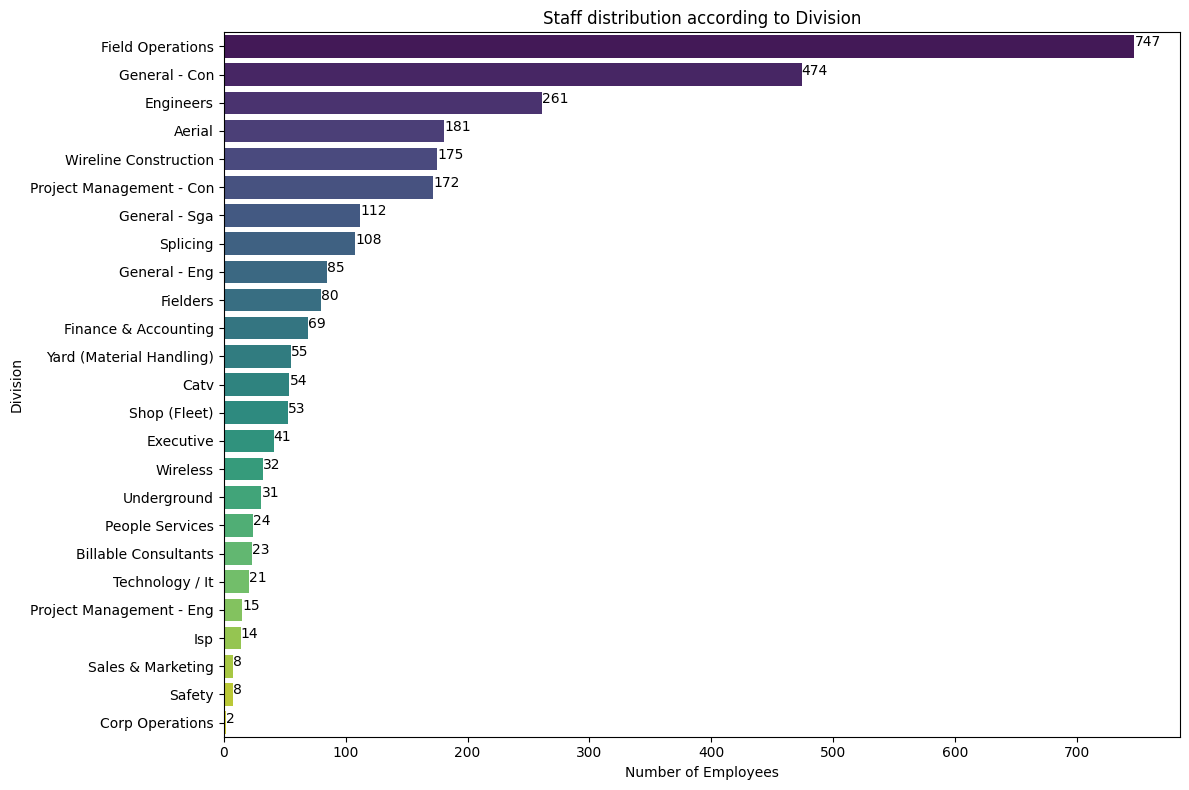

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Division', order=df['Division'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to Division')
plt.xlabel('Number of Employees')
plt.ylabel('Division')
for index, value in enumerate(df['Division'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

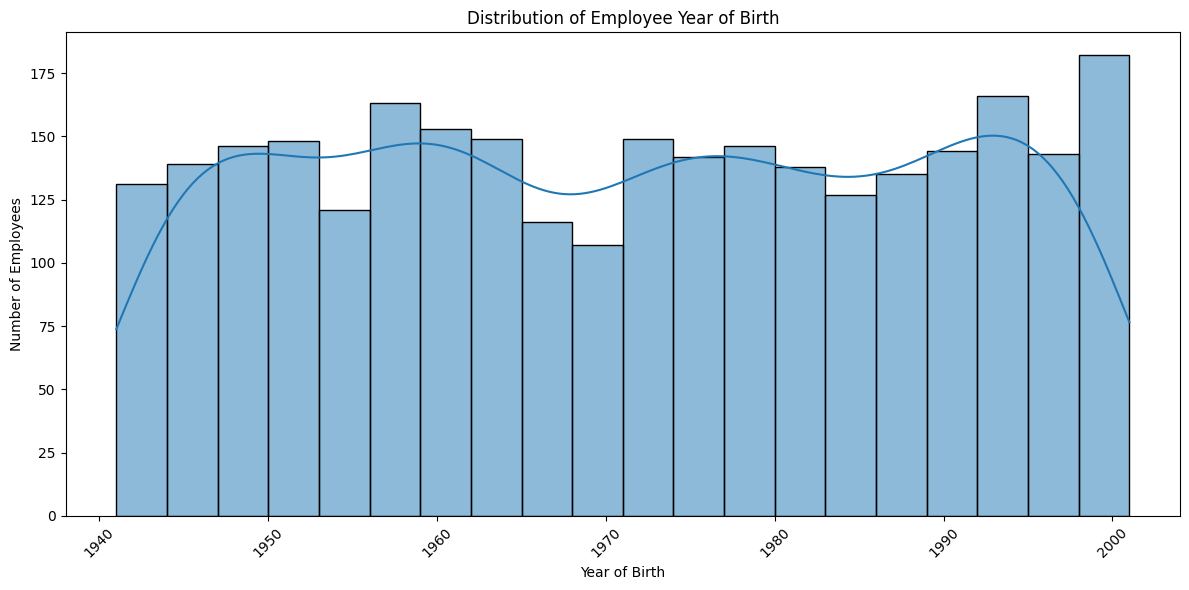

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year of Birth', bins=20, kde=True)
plt.title('Distribution of Employee Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
df['Year of Birth'].agg({'min','max'}) #The oldest employee was born in 1941, while the youngest employee was born in 2001

max    2001
min    1941
Name: Year of Birth, dtype: int64

In [47]:
df['State'].unique()

array(['MA', 'ND', 'FL', 'CT', 'CA', 'OR', 'TX', 'IN', 'GA', 'CO', 'KY',
       'NV', 'VT', 'PA', 'RI', 'VA', 'UT', 'ID', 'MT', 'WA', 'AZ', 'NH',
       'AL', 'OH', 'NY', 'ME', 'TN', 'NC'], dtype=object)

In [48]:
df['State'].value_counts()[:5] #The state with the highest number of employees is Massachusetts

State
MA    2523
TX      35
CT      33
ID      31
AZ      31
Name: count, dtype: int64

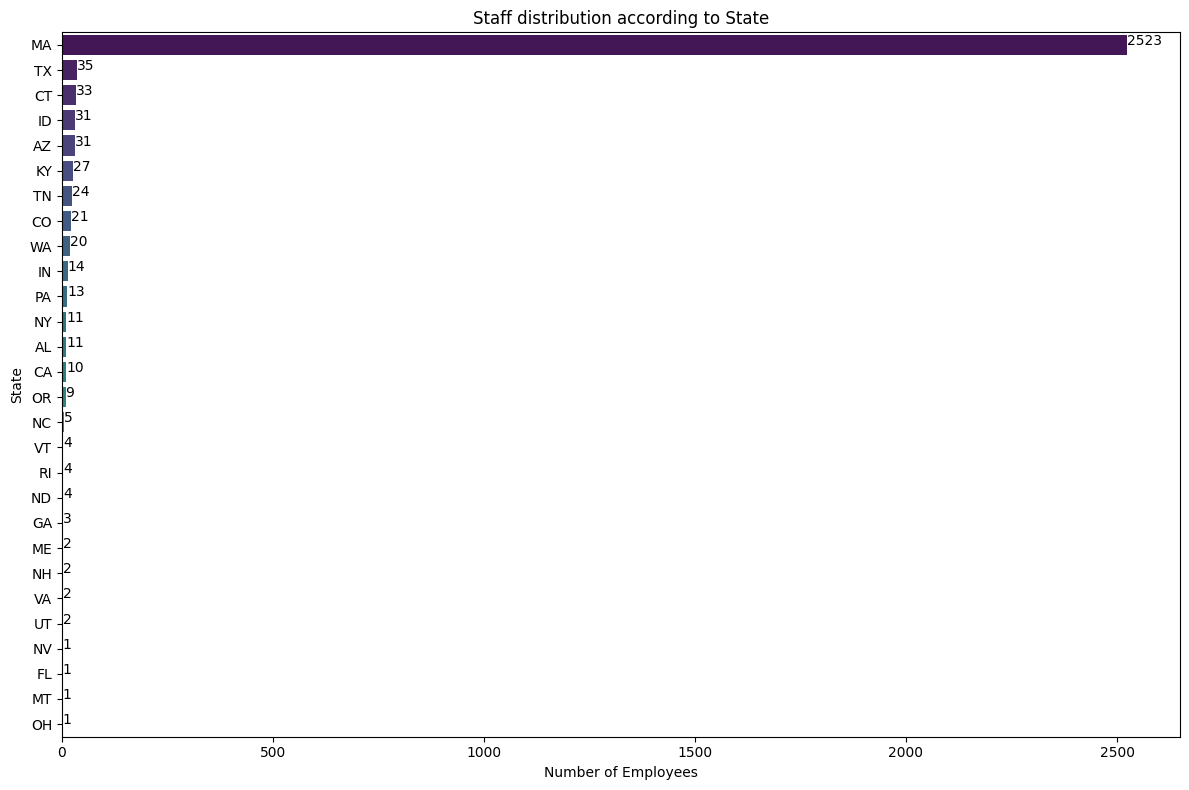

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='State', order=df['State'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to State')
plt.xlabel('Number of Employees')
plt.ylabel('State')
for index, value in enumerate(df['State'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [50]:
df['GenderCode'].value_counts()

GenderCode
Female    1588
Male      1257
Name: count, dtype: int64

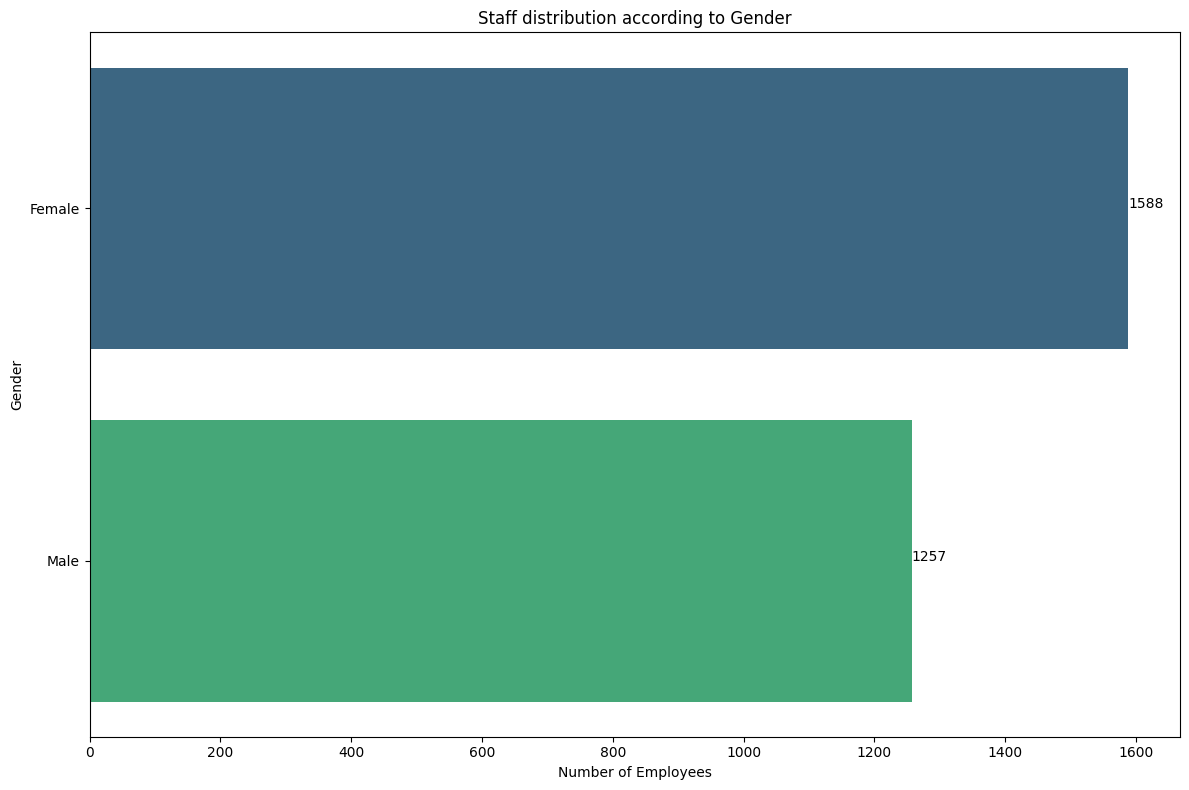

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='GenderCode', order=df['GenderCode'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to Gender')
plt.xlabel('Number of Employees')
plt.ylabel('Gender')
for index, value in enumerate(df['GenderCode'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [52]:
df['RaceDesc'].unique()

array(['White', 'Hispanic', 'Other', 'Black', 'Asian'], dtype=object)

In [53]:
df['RaceDesc'].value_counts() #the highest segment of employees is form Asian

RaceDesc
Asian       598
Black       579
White       572
Other       556
Hispanic    540
Name: count, dtype: int64

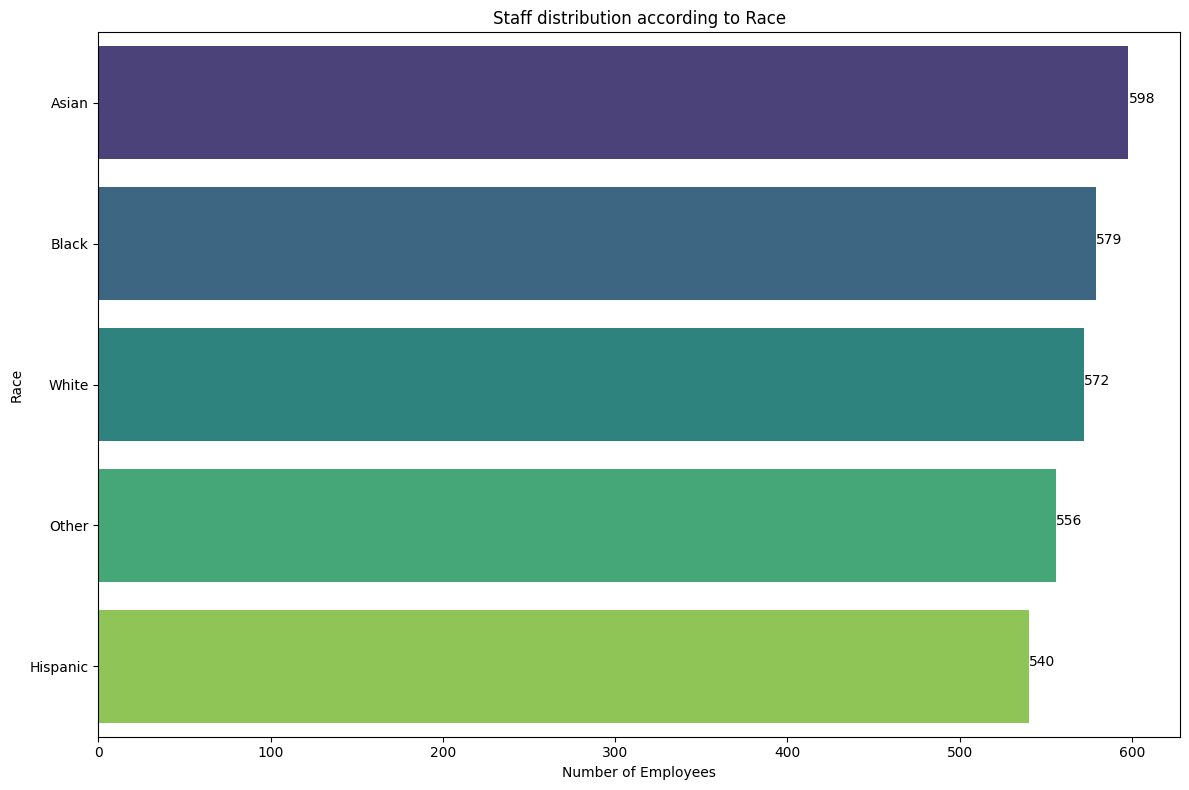

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='RaceDesc', order=df['RaceDesc'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to Race')
plt.xlabel('Number of Employees')
plt.ylabel('Race')
for index, value in enumerate(df['RaceDesc'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [55]:
df['MaritalDesc'].unique()

array(['Widowed', 'Single', 'Married', 'Divorced'], dtype=object)

In [56]:
df['MaritalDesc'].value_counts() #the highest segment of employees is single, married

MaritalDesc
Single      731
Married     730
Divorced    700
Widowed     684
Name: count, dtype: int64

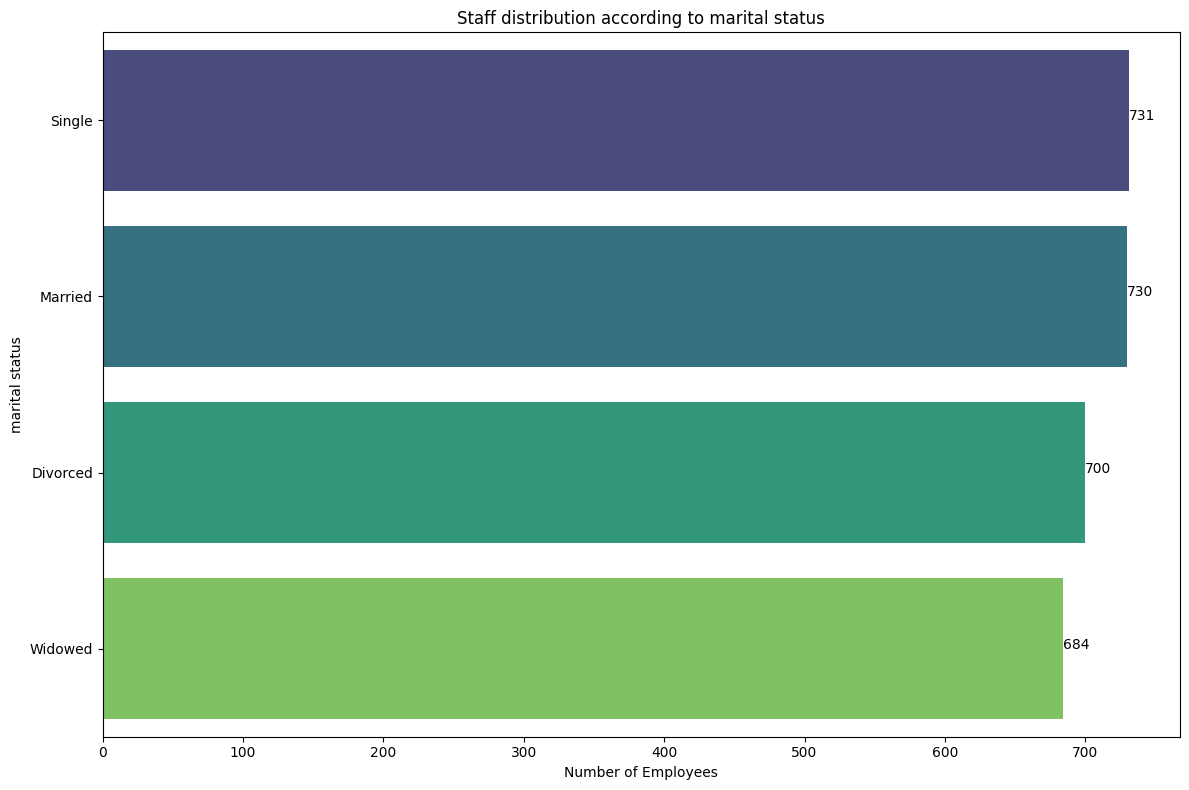

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='MaritalDesc', order=df['MaritalDesc'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to marital status')
plt.xlabel('Number of Employees')
plt.ylabel('marital status')
for index, value in enumerate(df['MaritalDesc'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [58]:
df['Performance Score'].unique()

array(['Fully Meets', 'Exceeds', 'Needs Improvement', 'PIP'], dtype=object)

In [59]:
df['Performance Score'].value_counts() #the highest segment of employees Fully Meets

Performance Score
Fully Meets          2251
Exceeds               346
Needs Improvement     162
PIP                    86
Name: count, dtype: int64

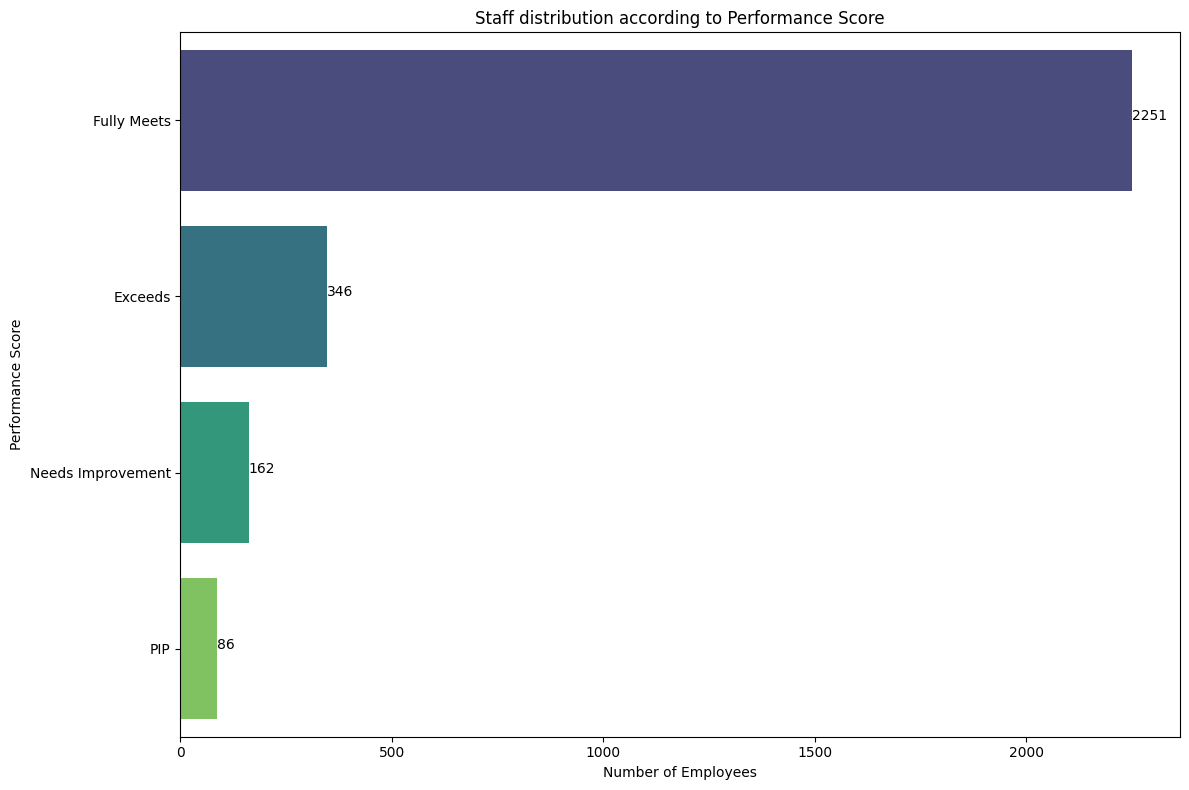

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Performance Score', order=df['Performance Score'].value_counts().index, palette='viridis')
plt.title('Staff distribution according to Performance Score')
plt.xlabel('Number of Employees')
plt.ylabel('Performance Score')
for index, value in enumerate(df['Performance Score'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [61]:
df['Current Employee Rating'].agg({'min','max','mean'})

max     5.000000
min     1.000000
mean    2.974692
Name: Current Employee Rating, dtype: float64

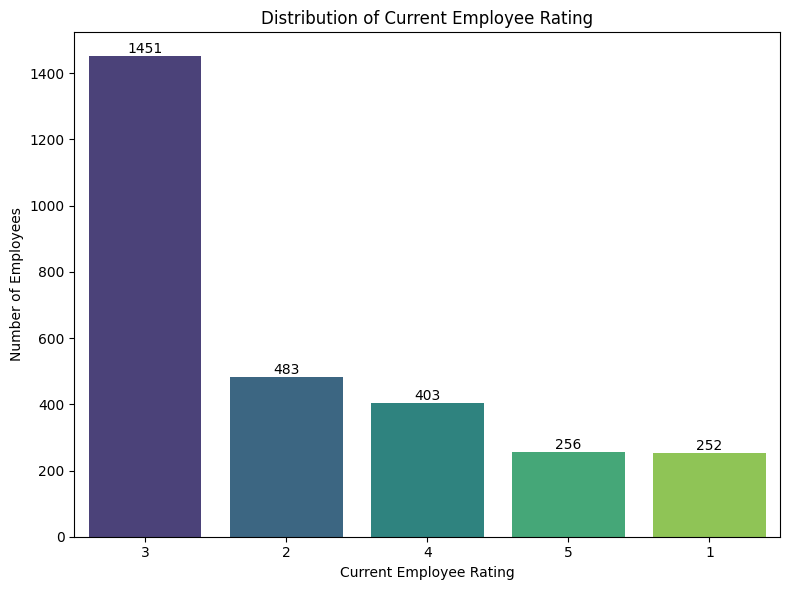

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Current Employee Rating', order=df['Current Employee Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Current Employee Rating')
plt.xlabel('Current Employee Rating')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Current Employee Rating'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

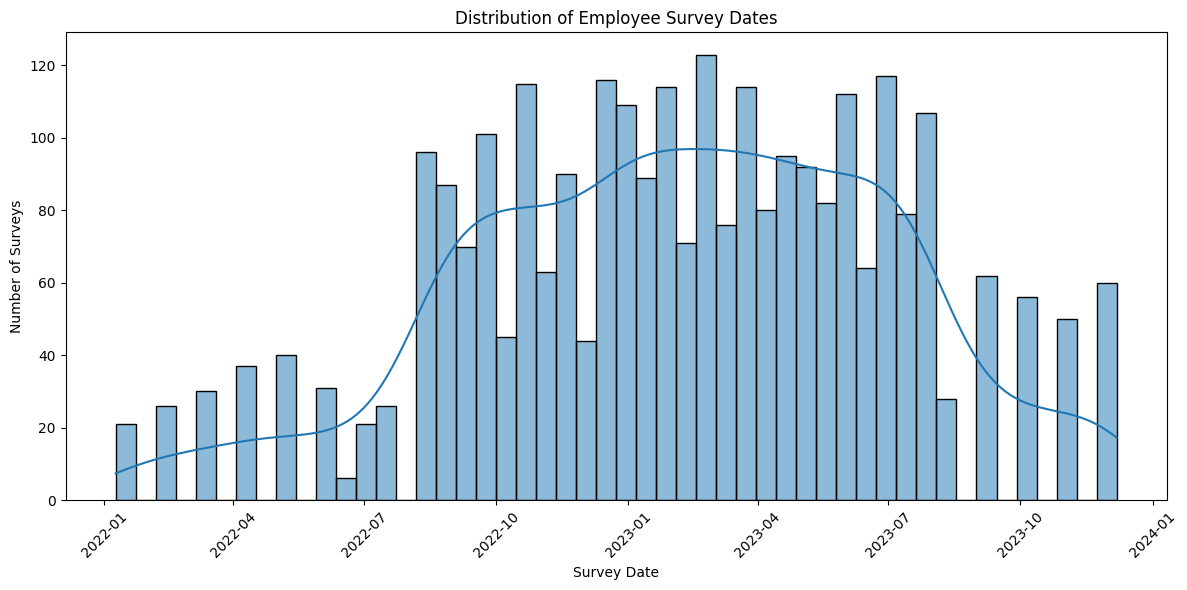

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Survey Date', bins=50, kde=True)
plt.title('Distribution of Employee Survey Dates')
plt.xlabel('Survey Date')
plt.ylabel('Number of Surveys')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
df['Engagement Score'].agg({'min','max','mean'})

max     5.000000
min     1.000000
mean    2.941652
Name: Engagement Score, dtype: float64

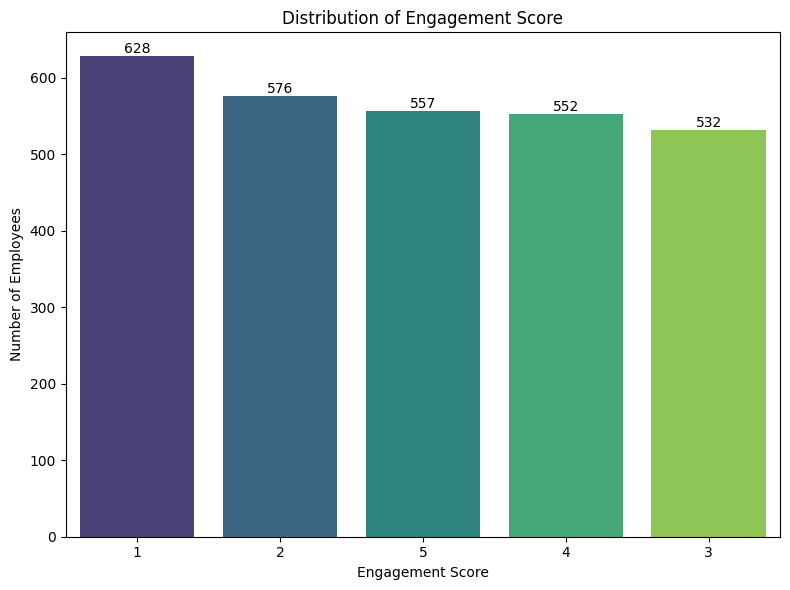

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Engagement Score', order=df['Engagement Score'].value_counts().index, palette='viridis')
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Engagement Score'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [66]:
df['Satisfaction Score'].agg({'min','max','mean'})

max     5.000000
min     1.000000
mean    3.028471
Name: Satisfaction Score, dtype: float64

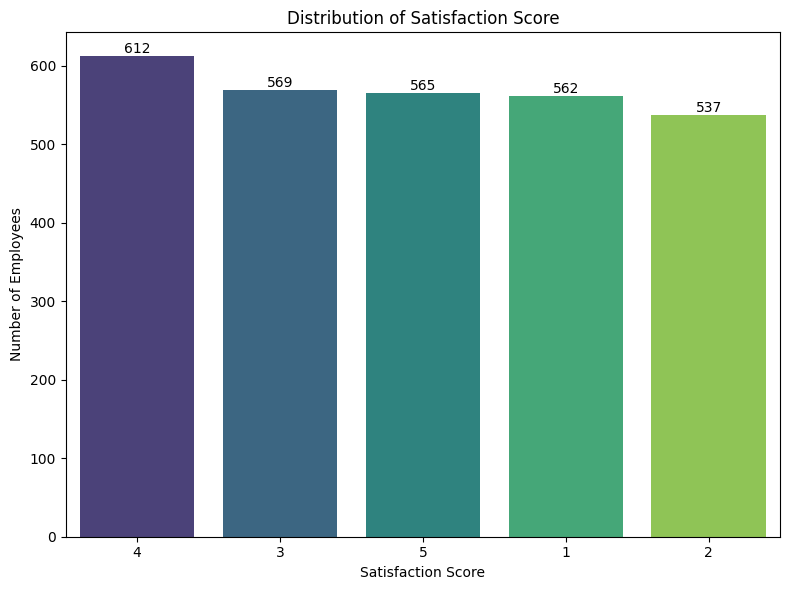

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction Score', order=df['Satisfaction Score'].value_counts().index, palette='viridis')
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Satisfaction Score'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [68]:
df['Work-Life Balance Score'].agg({'min','max','mean'})

max     5.000000
min     1.000000
mean    2.989104
Name: Work-Life Balance Score, dtype: float64

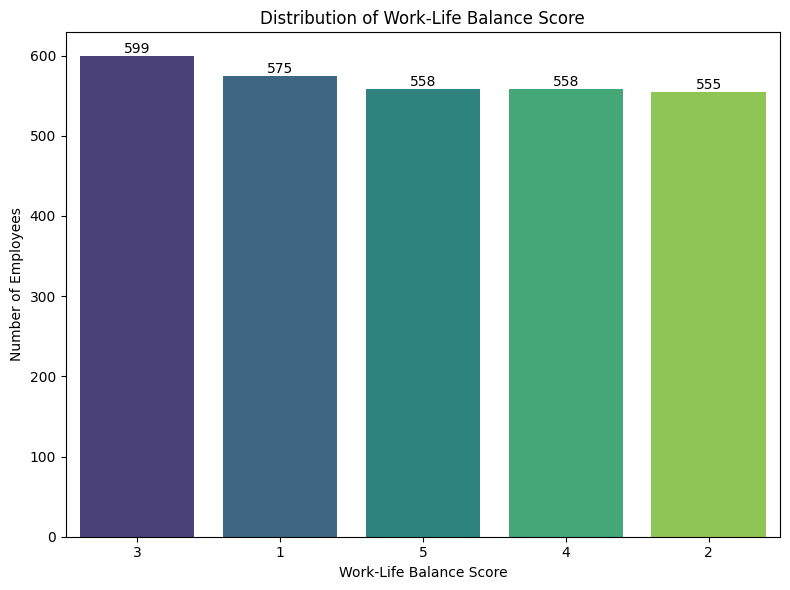

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Work-Life Balance Score', order=df['Work-Life Balance Score'].value_counts().index, palette='viridis')
plt.title('Distribution of Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Work-Life Balance Score'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

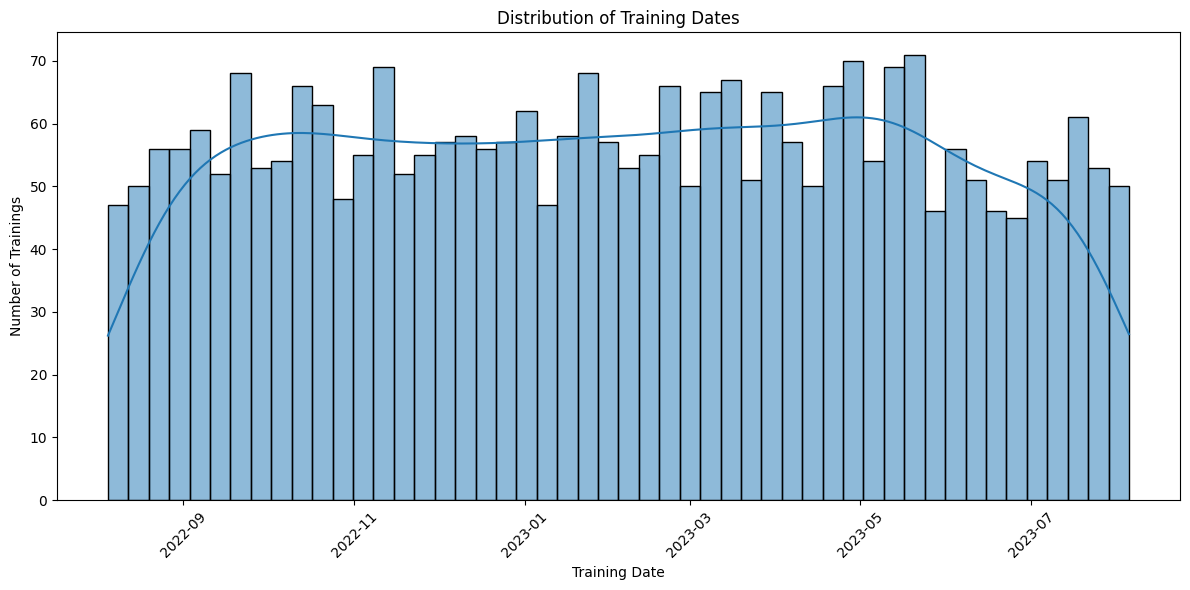

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Training Date', bins=50, kde=True)
plt.title('Distribution of Training Dates')
plt.xlabel('Training Date')
plt.ylabel('Number of Trainings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
df['Training Program Name'].unique()

array(['Leadership Development', 'Customer Service', 'Project Management',
       'Technical Skills', 'Communication Skills'], dtype=object)

In [72]:
df['Training Program Name'].value_counts()

Training Program Name
Communication Skills      633
Project Management        585
Leadership Development    544
Technical Skills          543
Customer Service          540
Name: count, dtype: int64

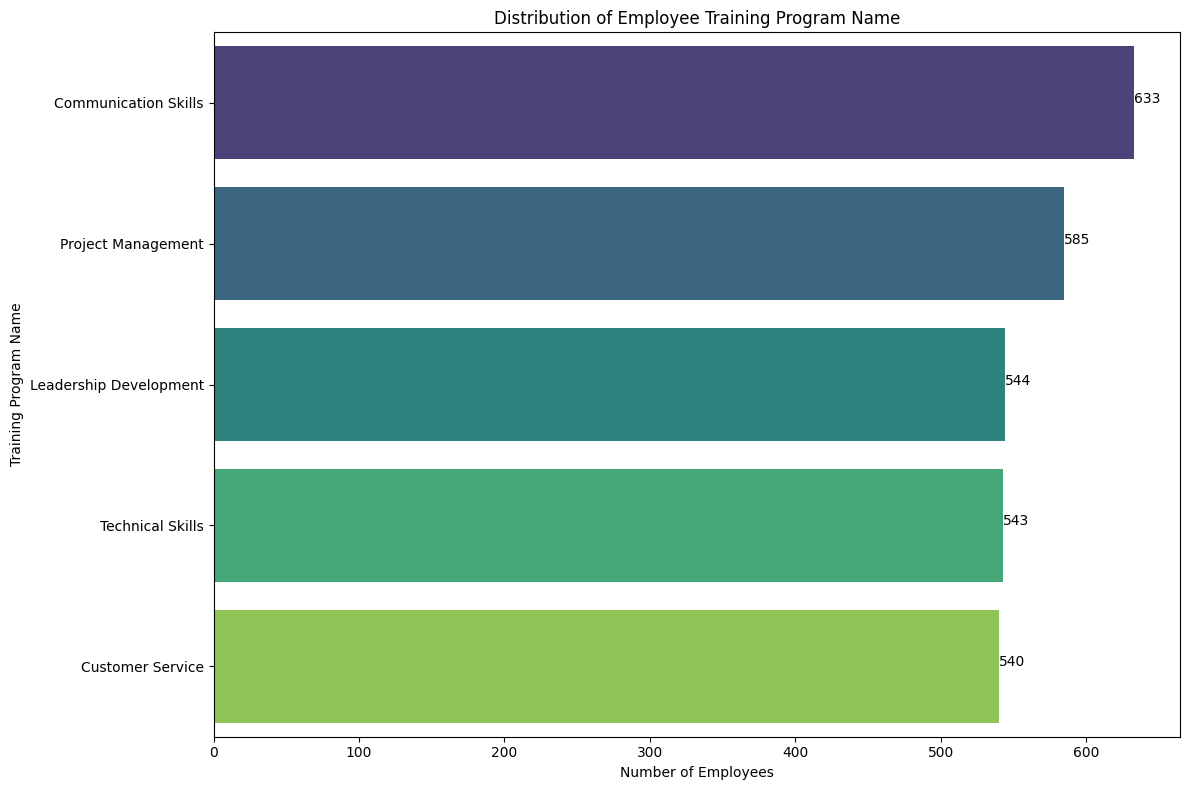

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Training Program Name', order=df['Training Program Name'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Training Program Name')
plt.xlabel('Number of Employees')
plt.ylabel('Training Program Name')
for index, value in enumerate(df['Training Program Name'].value_counts()):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [74]:
df['Training Type'].unique()

array(['Internal', 'External'], dtype=object)

In [75]:
df['Training Type'].value_counts()  

Training Type
External    1424
Internal    1421
Name: count, dtype: int64

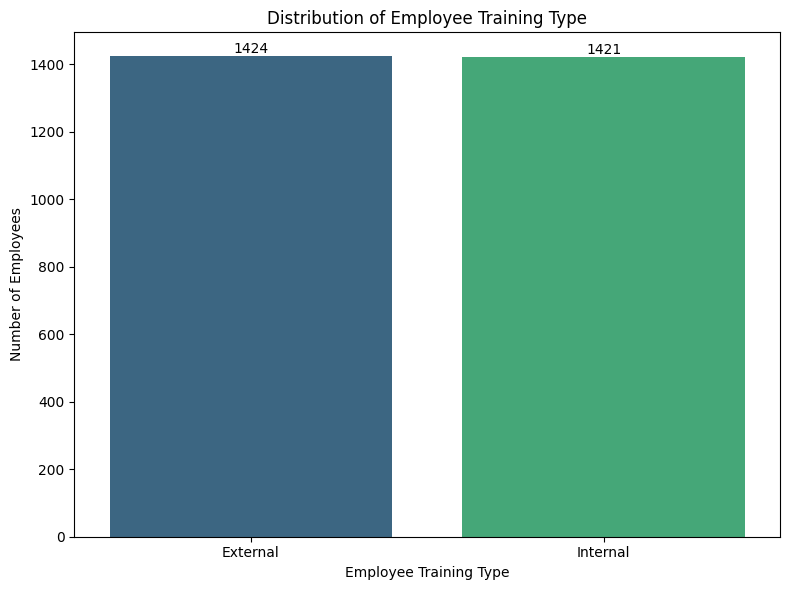

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Training Type', order=df['Training Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Training Type')
plt.xlabel('Employee Training Type')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Training Type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [77]:
df['Training Outcome'].unique()

array(['Failed', 'Incomplete', 'Completed', 'Passed'], dtype=object)

In [78]:
df['Training Outcome'].value_counts()

Training Outcome
Completed     737
Incomplete    731
Passed        709
Failed        668
Name: count, dtype: int64

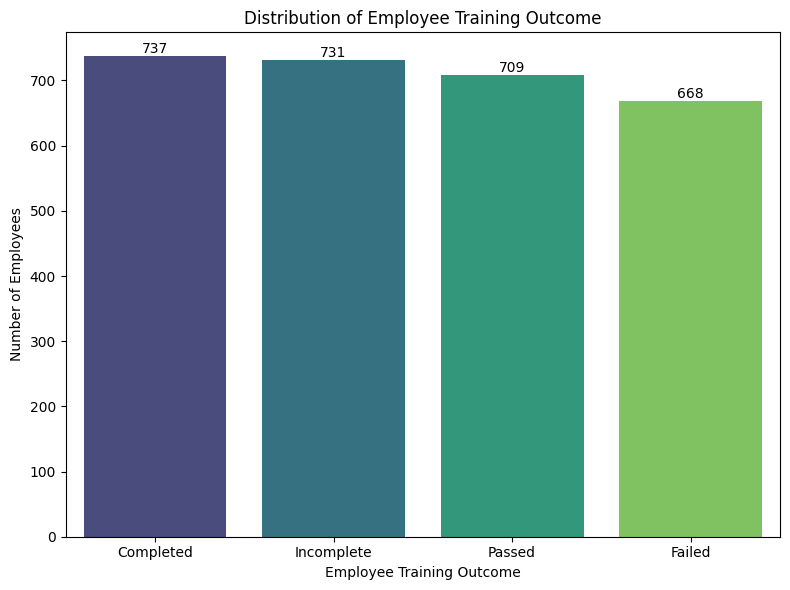

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Training Outcome', order=df['Training Outcome'].value_counts().index, palette='viridis')
plt.title('Distribution of Employee Training Outcome')
plt.xlabel('Employee Training Outcome')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Training Outcome'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [80]:
df['Training Duration(Days)'].unique()

array([2, 4, 3, 5, 1])

In [81]:
df['Training Duration(Days)'].value_counts()

Training Duration(Days)
1    588
3    579
2    572
5    568
4    538
Name: count, dtype: int64

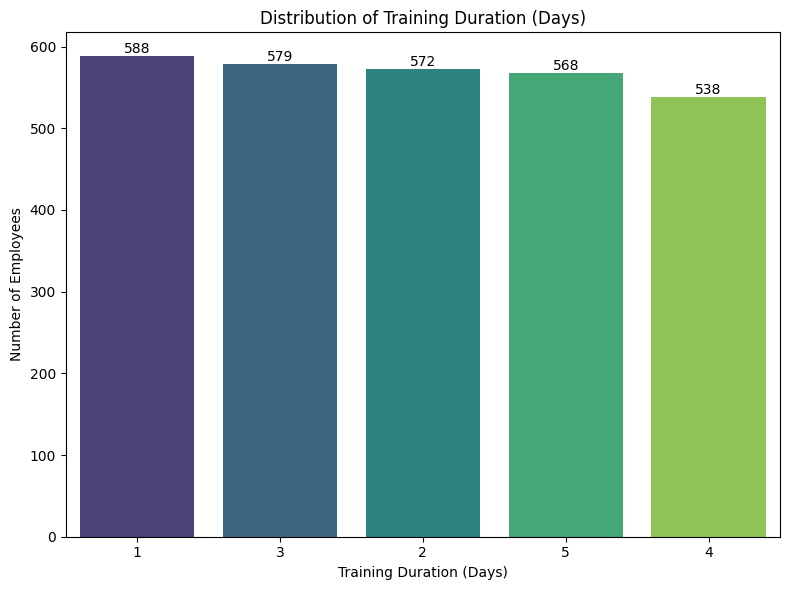

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Training Duration(Days)', order=df['Training Duration(Days)'].value_counts().index, palette='viridis')
plt.title('Distribution of Training Duration (Days)')
plt.xlabel('Training Duration (Days)')
plt.ylabel('Number of Employees')
for index, value in enumerate(df['Training Duration(Days)'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [83]:
df['Training Cost'].agg({'min','max','mean','sum'})

max     9.999700e+02
min     1.000400e+02
sum     1.591149e+06
mean    5.592790e+02
Name: Training Cost, dtype: float64

In [84]:
df['Age'].agg({'min','max','mean'})

max     82.000000
min     17.000000
mean    49.448506
Name: Age, dtype: float64

### Multivariant Analysis
Here, we explore the relationships between different variables to answer critical business questions.

In [85]:
status_dept = (
    df.groupby(['DepartmentType', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_dept = status_dept.groupby('DepartmentType')['EmployeeCount'].transform('sum')
status_dept['PercentInDept'] = (status_dept['EmployeeCount'] / total_by_dept * 100).round(1)

status_dept

,DepartmentType,EmployeeStatus,EmployeeCount,PercentInDept
0,Admin Offices,Active,78,98.7
1,Admin Offices,Terminated,1,1.3
2,Executive Office,Active,24,100.0
3,IT/IS,Active,375,91.7
4,IT/IS,Terminated,34,8.3
5,Production,Active,1588,83.1
6,Production,Terminated,322,16.9
7,Sales,Active,301,96.8
8,Sales,Terminated,10,3.2
9,Software Engineering,Active,92,82.1


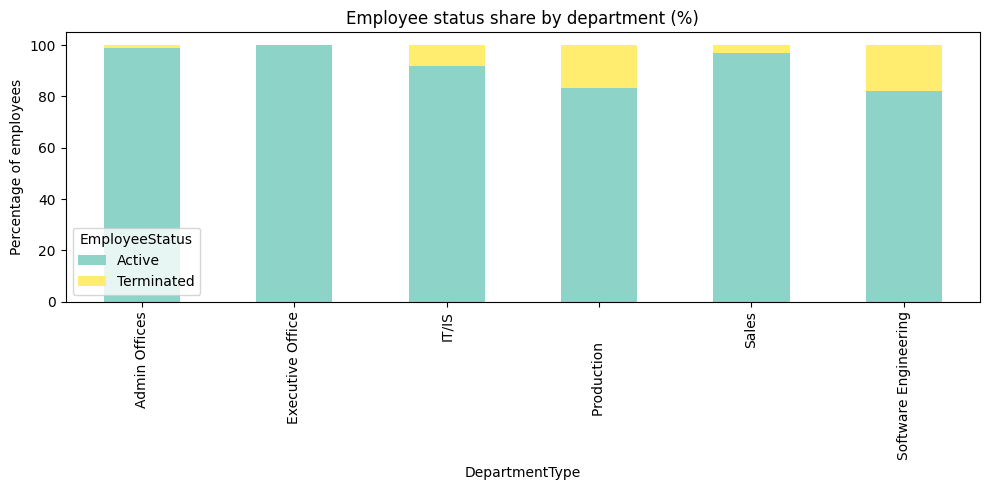

In [86]:
pivot_status_dept = status_dept.pivot(index='DepartmentType', columns='EmployeeStatus', values='PercentInDept')
pivot_status_dept.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Employee status share by department (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('DepartmentType')
plt.legend(title='EmployeeStatus')
plt.tight_layout()
plt.show()


In [87]:
status_bu = (
    df.groupby(['BusinessUnit', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_bu = status_bu.groupby('BusinessUnit')['EmployeeCount'].transform('sum')
status_bu['PercentInBU'] = (status_bu['EmployeeCount'] / total_by_bu * 100).round(1)

status_bu

,BusinessUnit,EmployeeStatus,EmployeeCount,PercentInBU
0,BPC,Active,243,84.4
1,BPC,Terminated,45,15.6
2,CCDR,Active,249,87.7
3,CCDR,Terminated,35,12.3
4,EW,Active,245,86.9
5,EW,Terminated,37,13.1
6,MSC,Active,239,84.8
7,MSC,Terminated,43,15.2
8,NEL,Active,246,84.5
9,NEL,Terminated,45,15.5


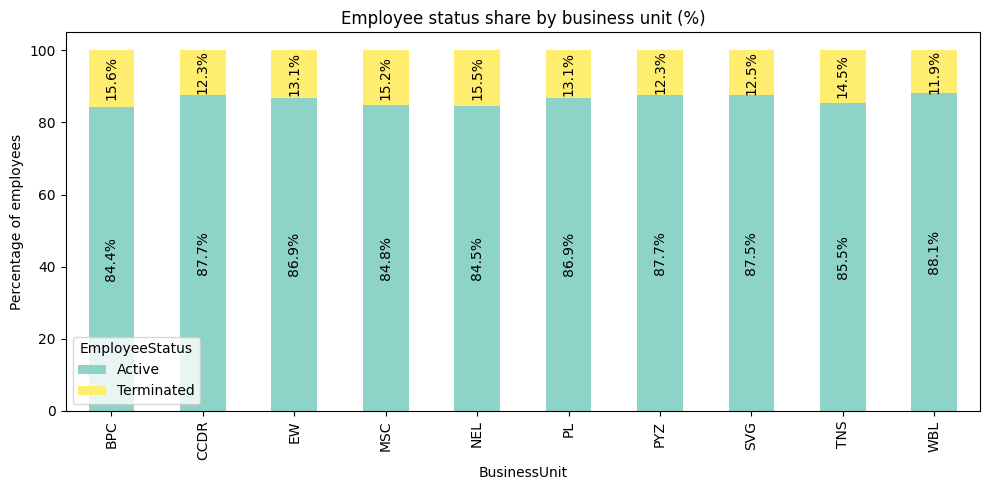

In [88]:
pivot_status_bu = status_bu.pivot(index='BusinessUnit', columns='EmployeeStatus', values='PercentInBU')

ax = pivot_status_bu.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Employee status share by business unit (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('BusinessUnit')
plt.legend(title='EmployeeStatus')

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=90)

plt.tight_layout()
plt.show()

In [89]:
status_DI = (
    df.groupby(['Division', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_DI = status_DI.groupby('Division')['EmployeeCount'].transform('sum')
status_DI['PercentInDI'] = (status_DI['EmployeeCount'] / total_by_DI * 100).round(1)

status_DI

,Division,EmployeeStatus,EmployeeCount,PercentInDI
0,Aerial,Active,158,87.3
1,Aerial,Terminated,23,12.7
2,Billable Consultants,Active,19,82.6
3,Billable Consultants,Terminated,4,17.4
4,Catv,Active,47,87.0
5,Catv,Terminated,7,13.0
6,Corp Operations,Active,2,100.0
7,Engineers,Active,223,85.4
8,Engineers,Terminated,38,14.6
9,Executive,Active,38,92.7


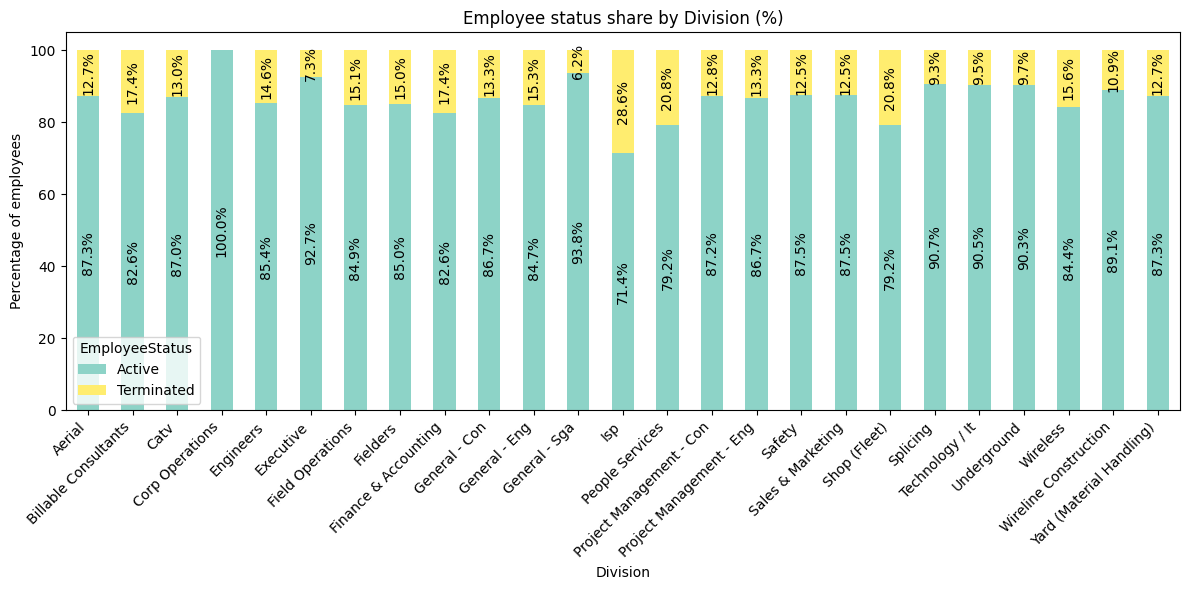

In [90]:
pivot_status_DI = status_DI.pivot(index='Division', columns='EmployeeStatus', values='PercentInDI')

ax = pivot_status_DI.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Employee status share by Division (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('Division')
plt.legend(title='EmployeeStatus')
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=90)

plt.tight_layout()
plt.show()

In [91]:
status_type = (
    df.groupby(['EmployeeType', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_type = status_type.groupby('EmployeeType')['EmployeeCount'].transform('sum')
status_type['PercentInType'] = (status_type['EmployeeCount'] / total_by_type * 100).round(1)
status_type

,EmployeeType,EmployeeStatus,EmployeeCount,PercentInType
0,Contract,Active,829,87.2
1,Contract,Terminated,122,12.8
2,Full-Time,Active,850,85.3
3,Full-Time,Terminated,147,14.7
4,Part-Time,Active,779,86.8
5,Part-Time,Terminated,118,13.2


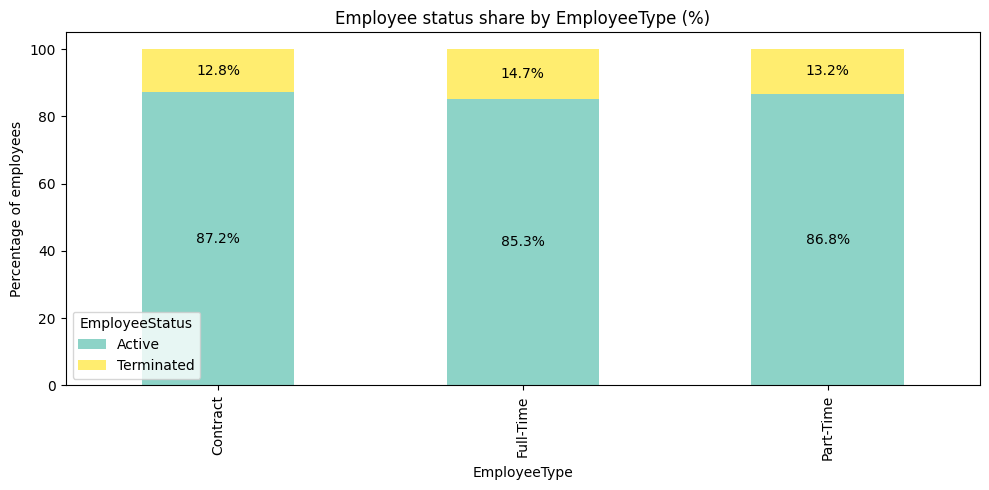

In [92]:
pivot_status_type = status_type.pivot(index='EmployeeType', columns='EmployeeStatus', values='PercentInType')

ax = pivot_status_type.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Employee status share by EmployeeType (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('EmployeeType')
plt.legend(title='EmployeeStatus')

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [93]:
status_type = (
    df.groupby(['EmployeeClassificationType', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_type = status_type.groupby('EmployeeClassificationType')['EmployeeCount'].transform('sum')
status_type['PercentInType'] = (status_type['EmployeeCount'] / total_by_type * 100).round(1)
status_type

,EmployeeClassificationType,EmployeeStatus,EmployeeCount,PercentInType
0,Full-Time,Active,840,87.0
1,Full-Time,Terminated,126,13.0
2,Part-Time,Active,779,86.7
3,Part-Time,Terminated,120,13.3
4,Temporary,Active,839,85.6
5,Temporary,Terminated,141,14.4


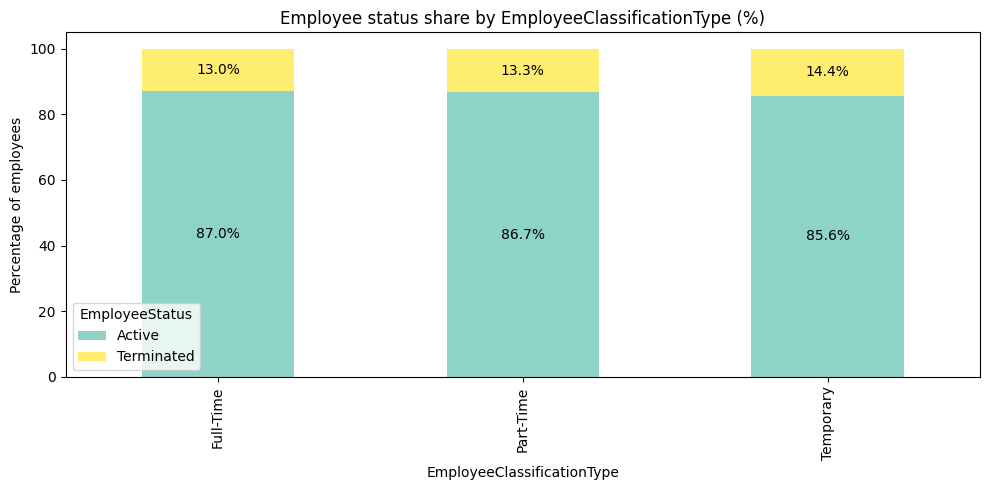

In [94]:
pivot_status_type = status_type.pivot(index='EmployeeClassificationType', columns='EmployeeStatus', values='PercentInType')

ax = pivot_status_type.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Employee status share by EmployeeClassificationType (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('EmployeeClassificationType')
plt.legend(title='EmployeeStatus')

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [95]:
perf_scores = (
    df.groupby('Performance Score')[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
      .mean()
      .round(2)
      .reset_index()
)

perf_scores

,Performance Score,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,Exceeds,2.86,2.94,2.96
1,Fully Meets,2.96,3.05,3.00
2,Needs Improvement,2.88,3.04,2.86
3,PIP,2.92,2.72,2.97


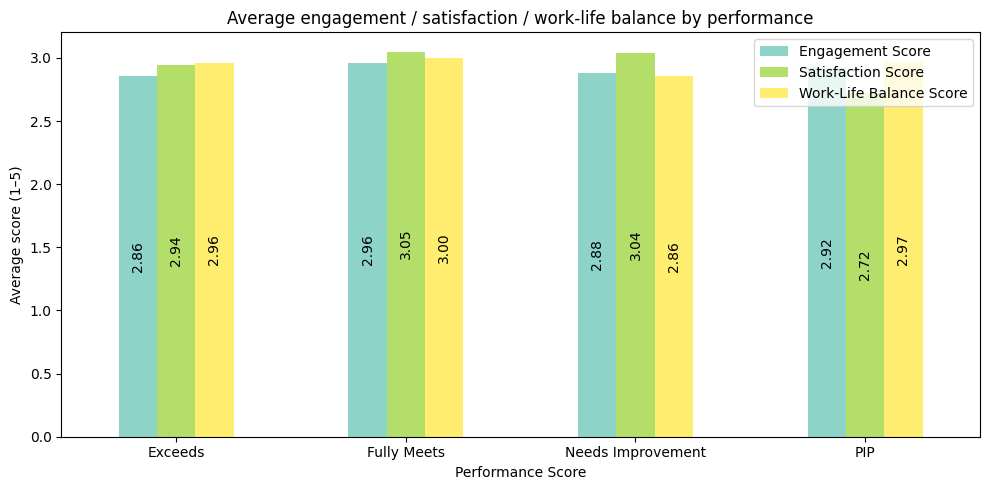

In [96]:
ax = perf_scores.set_index('Performance Score')[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']] \
    .plot(kind='bar', figsize=(10, 5), colormap='Set3')
plt.title('Average engagement / satisfaction / work-life balance by performance')
plt.ylabel('Average score (1–5)')
plt.xlabel('Performance Score')
plt.xticks(rotation=0)
for container in ax.containers:
    labels = [f'{h.get_height():.2f}' if h.get_height() > 0 else '' for h in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=90)

plt.tight_layout()
plt.show()

In [97]:
bins = [17, 30, 40, 50, 60, 82]
labels = ['<30', '30–39', '40–49', '50–59', '60+']
df['AgeBand'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_perf = (
    df.groupby(['AgeBand', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_ageband = age_perf.groupby('AgeBand')['EmployeeCount'].transform('sum')
age_perf['PercentInBand'] = (age_perf['EmployeeCount'] / total_by_ageband * 100).round(1)
age_perf

,AgeBand,Performance Score,EmployeeCount,PercentInBand
0,<30,Exceeds,70,12.7
1,<30,Fully Meets,434,78.8
2,<30,Needs Improvement,27,4.9
3,<30,PIP,20,3.6
4,30–39,Exceeds,57,12.6
5,30–39,Fully Meets,357,78.8
6,30–39,Needs Improvement,26,5.7
7,30–39,PIP,13,2.9
8,40–49,Exceeds,50,10.6
9,40–49,Fully Meets,379,80.1


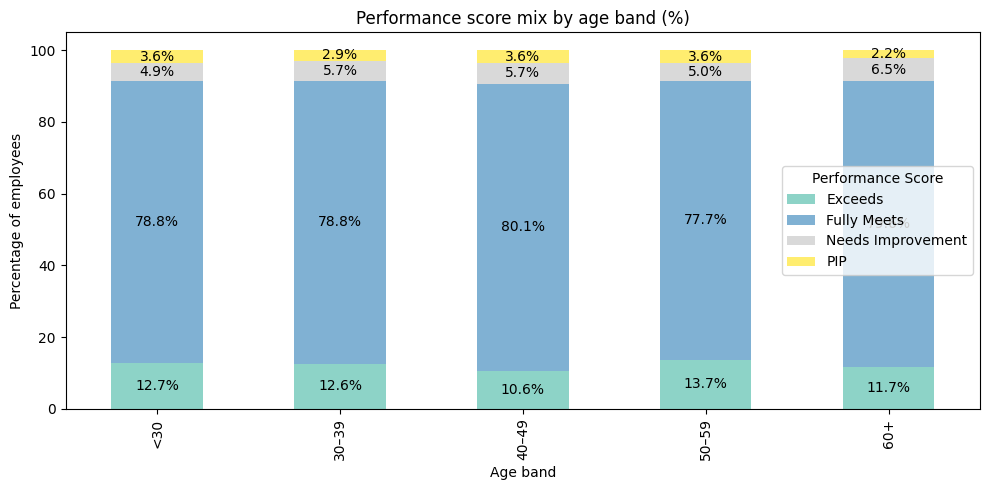

In [98]:
pivot_age_perf = age_perf.pivot(index='AgeBand', columns='Performance Score', values='PercentInBand')

ax = pivot_age_perf.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Performance score mix by age band (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('Age band')
plt.legend(title='Performance Score')
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [99]:
train_perf = (
    df.groupby(['Training Outcome', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_outcome = train_perf.groupby('Training Outcome')['EmployeeCount'].transform('sum')
train_perf['PercentInOutcome'] = (train_perf['EmployeeCount'] / total_by_outcome * 100).round(1)

train_perf

,Training Outcome,Performance Score,EmployeeCount,PercentInOutcome
0,Completed,Exceeds,95,12.9
1,Completed,Fully Meets,569,77.2
2,Completed,Needs Improvement,48,6.5
3,Completed,PIP,25,3.4
4,Failed,Exceeds,76,11.4
5,Failed,Fully Meets,540,80.8
6,Failed,Needs Improvement,32,4.8
7,Failed,PIP,20,3.0
8,Incomplete,Exceeds,81,11.1
9,Incomplete,Fully Meets,598,81.8


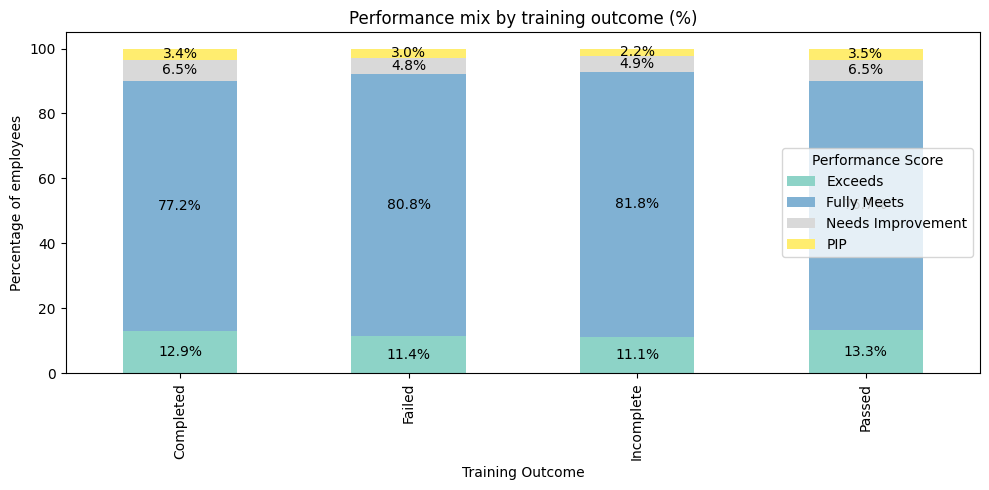

In [100]:
pivot_train_perf = train_perf.pivot(index='Training Outcome', columns='Performance Score', values='PercentInOutcome')

ax = pivot_train_perf.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Performance mix by training outcome (%)')
plt.ylabel('Percentage of employees')
plt.xlabel('Training Outcome')
plt.legend(title='Performance Score')

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [101]:
type_perf = (
    df.groupby(['Training Type', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_type = type_perf.groupby('Training Type')['EmployeeCount'].transform('sum')
type_perf['PercentInType'] = (type_perf['EmployeeCount'] / total_by_type * 100).round(1)

type_perf

,Training Type,Performance Score,EmployeeCount,PercentInType
0,External,Exceeds,184,12.9
1,External,Fully Meets,1118,78.5
2,External,Needs Improvement,75,5.3
3,External,PIP,47,3.3
4,Internal,Exceeds,162,11.4
5,Internal,Fully Meets,1133,79.7
6,Internal,Needs Improvement,87,6.1
7,Internal,PIP,39,2.7


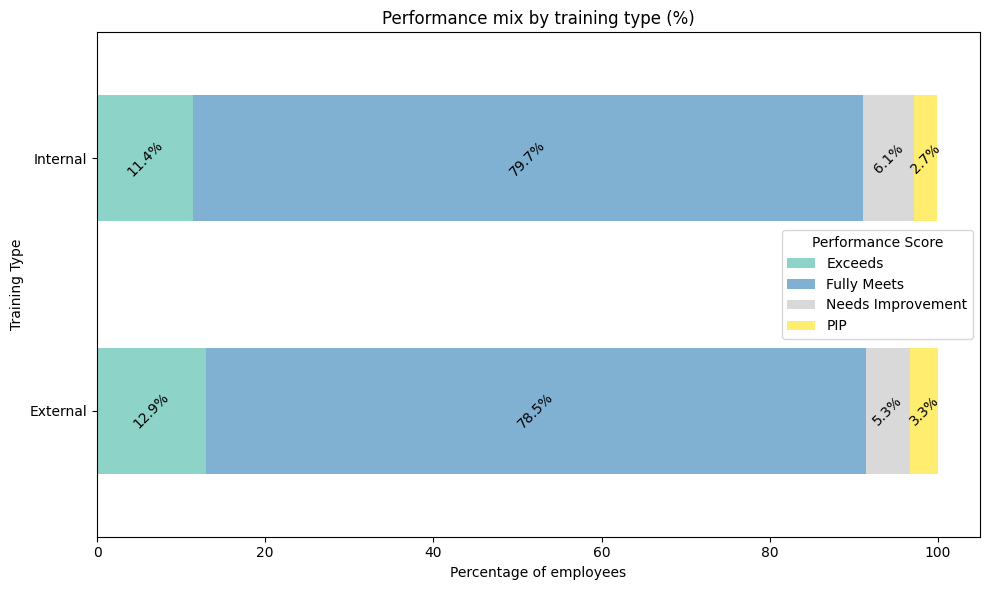

In [102]:
pivot_type_perf = type_perf.pivot(index='Training Type', columns='Performance Score', values='PercentInType')

ax = pivot_type_perf.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Performance mix by training type (%)')
plt.xlabel('Percentage of employees')
plt.ylabel('Training Type')
plt.legend(title='Performance Score')
for container in ax.containers:
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center',rotation=45)

plt.tight_layout()
plt.show()

In [103]:
dept_scores = (
    df.groupby('DepartmentType')[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
      .mean()
      .round(2)
      .reset_index()
)

dept_scores

,DepartmentType,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,Admin Offices,2.95,2.51,3.20
1,Executive Office,3.38,3.08,3.29
2,IT/IS,3.02,3.01,2.98
3,Production,2.91,3.03,2.97
4,Sales,2.98,3.14,3.03
5,Software Engineering,2.96,3.10,2.99


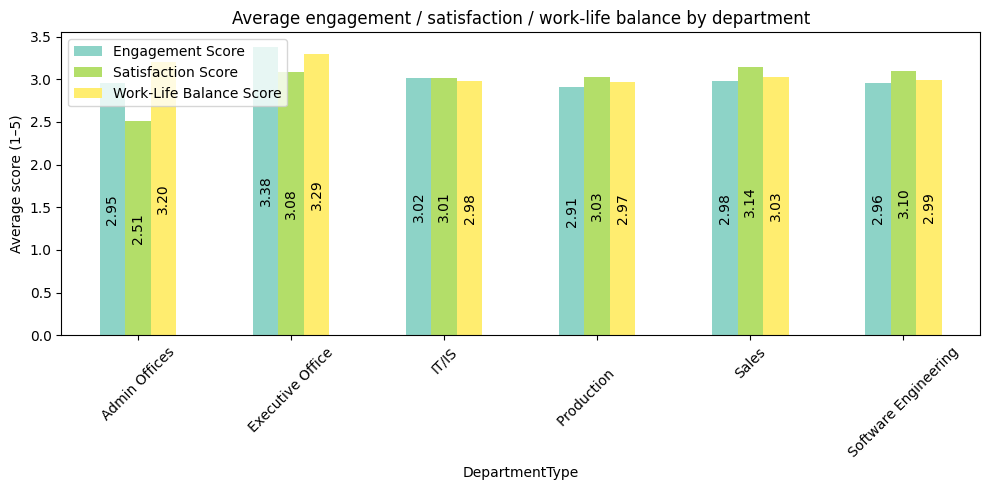

In [104]:
ax = dept_scores.set_index('DepartmentType')[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']] \
    .plot(kind='bar', figsize=(10, 5), colormap='Set3')
plt.title('Average engagement / satisfaction / work-life balance by department')
plt.ylabel('Average score (1–5)')
plt.xlabel('DepartmentType')
plt.xticks(rotation=45)
for container in ax.containers:
    labels = [f'{h.get_height():.2f}' if h.get_height() > 0 else '' for h in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=90)

plt.tight_layout()
plt.show()

In [105]:
zone_perf = (
    df.groupby(['PayZone', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_zone = zone_perf.groupby('PayZone')['EmployeeCount'].transform('sum')
zone_perf['PercentInZone'] = (zone_perf['EmployeeCount'] / total_by_zone * 100).round(1)

zone_perf

,PayZone,Performance Score,EmployeeCount,PercentInZone
0,Zone A,Exceeds,125,12.3
1,Zone A,Fully Meets,800,79.0
2,Zone A,Needs Improvement,55,5.4
3,Zone A,PIP,33,3.3
4,Zone B,Exceeds,114,12.2
5,Zone B,Fully Meets,747,80.0
6,Zone B,Needs Improvement,46,4.9
7,Zone B,PIP,27,2.9
8,Zone C,Exceeds,107,11.9
9,Zone C,Fully Meets,704,78.4


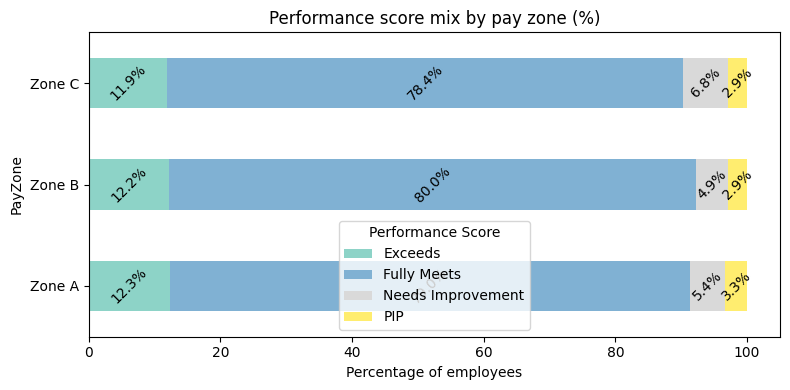

In [106]:
pivot_zone_perf = zone_perf.pivot(index='PayZone', columns='Performance Score', values='PercentInZone')

ax = pivot_zone_perf.plot(kind='barh', stacked=True, figsize=(8, 4), colormap='Set3')
plt.title('Performance score mix by pay zone (%)')
plt.xlabel('Percentage of employees')
plt.ylabel('PayZone')
plt.legend(title='Performance Score')
for container in ax.containers:
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

In [107]:
gender_perf = (
    df.groupby(['GenderCode', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_gender = gender_perf.groupby('GenderCode')['EmployeeCount'].transform('sum')
gender_perf['PercentInGender'] = (gender_perf['EmployeeCount'] / total_by_gender * 100).round(1)

gender_perf

,GenderCode,Performance Score,EmployeeCount,PercentInGender
0,Female,Exceeds,228,14.4
1,Female,Fully Meets,1212,76.3
2,Female,Needs Improvement,95,6.0
3,Female,PIP,53,3.3
4,Male,Exceeds,118,9.4
5,Male,Fully Meets,1039,82.7
6,Male,Needs Improvement,67,5.3
7,Male,PIP,33,2.6


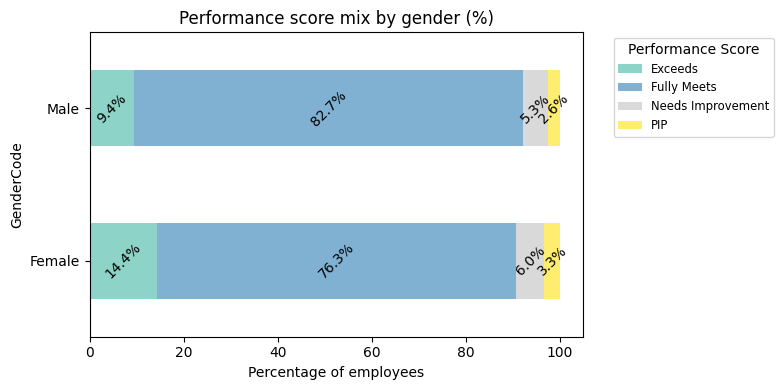

In [108]:
pivot_gender_perf = gender_perf.pivot(index='GenderCode', columns='Performance Score', values='PercentInGender')

ax = pivot_gender_perf.plot(kind='barh', stacked=True, figsize=(8, 4), colormap='Set3')
plt.title('Performance score mix by gender (%)')
plt.xlabel('Percentage of employees')
plt.ylabel('GenderCode')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
for container in ax.containers:
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

In [109]:
race_status = (
    df.groupby(['RaceDesc', 'EmployeeStatus'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_race = race_status.groupby('RaceDesc')['EmployeeCount'].transform('sum')
race_status['PercentInRace'] = (race_status['EmployeeCount'] / total_by_race * 100).round(1)

race_status

,RaceDesc,EmployeeStatus,EmployeeCount,PercentInRace
0,Asian,Active,515,86.1
1,Asian,Terminated,83,13.9
2,Black,Active,510,88.1
3,Black,Terminated,69,11.9
4,Hispanic,Active,470,87.0
5,Hispanic,Terminated,70,13.0
6,Other,Active,473,85.1
7,Other,Terminated,83,14.9
8,White,Active,490,85.7
9,White,Terminated,82,14.3


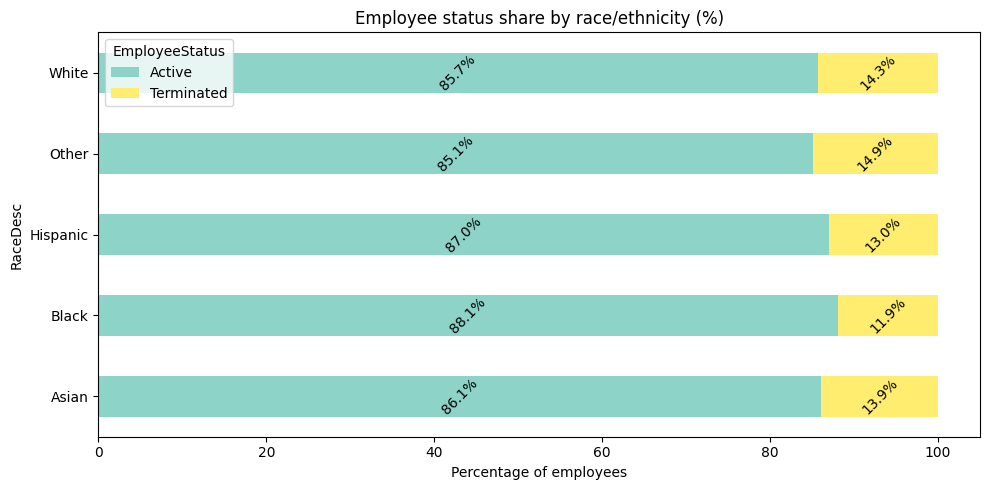

In [110]:
pivot_race_status = race_status.pivot(index='RaceDesc', columns='EmployeeStatus', values='PercentInRace')

ax = pivot_race_status.plot(kind='barh', stacked=True, figsize=(10, 5), colormap='Set3')
plt.title('Employee status share by race/ethnicity (%)')
plt.xlabel('Percentage of employees')
plt.ylabel('RaceDesc')
plt.legend(title='EmployeeStatus')
for container in ax.containers:
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

In [111]:
marital_eng = (
    df.groupby('MaritalDesc')[['Engagement Score', 'Satisfaction Score']]
      .mean()
      .round(2)
      .reset_index()
)

marital_eng

,MaritalDesc,Engagement Score,Satisfaction Score
0,Divorced,2.97,3.08
1,Married,2.80,3.03
2,Single,3.01,3.05
3,Widowed,2.99,2.95


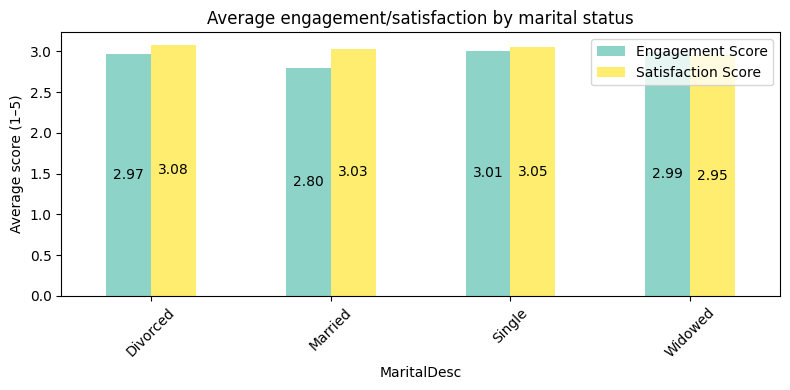

In [112]:
ax = marital_eng.set_index('MaritalDesc')[['Engagement Score', 'Satisfaction Score']] \
    .plot(kind='bar', figsize=(8, 4), colormap='Set3')
plt.title('Average engagement/satisfaction by marital status')
plt.ylabel('Average score (1–5)')
plt.xlabel('MaritalDesc')
plt.xticks(rotation=45)
for container in ax.containers:
    labels = [f'{h.get_height():.2f}' if h.get_height() > 0 else '' for h in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [113]:
top_titles = df['Title'].value_counts().head(10).index
title_perf = (
    df[df['Title'].isin(top_titles)]
      .groupby(['Title', 'Performance Score'])['Employee ID']
      .count()
      .reset_index(name='EmployeeCount')
)

total_by_title = title_perf.groupby('Title')['EmployeeCount'].transform('sum')
title_perf['PercentInTitle'] = (title_perf['EmployeeCount'] / total_by_title * 100).round(1)

title_perf


,Title,Performance Score,EmployeeCount,PercentInTitle
0,Area Sales Manager,Exceeds,17,6.1
1,Area Sales Manager,Fully Meets,249,89.9
2,Area Sales Manager,Needs Improvement,11,4.0
3,BI Developer,Exceeds,1,2.3
4,BI Developer,Fully Meets,40,90.9
5,BI Developer,Needs Improvement,3,6.8
6,Data Analyst,Exceeds,1,1.8
7,Data Analyst,Fully Meets,53,96.4
8,Data Analyst,PIP,1,1.8
9,IT Support,Exceeds,11,12.5


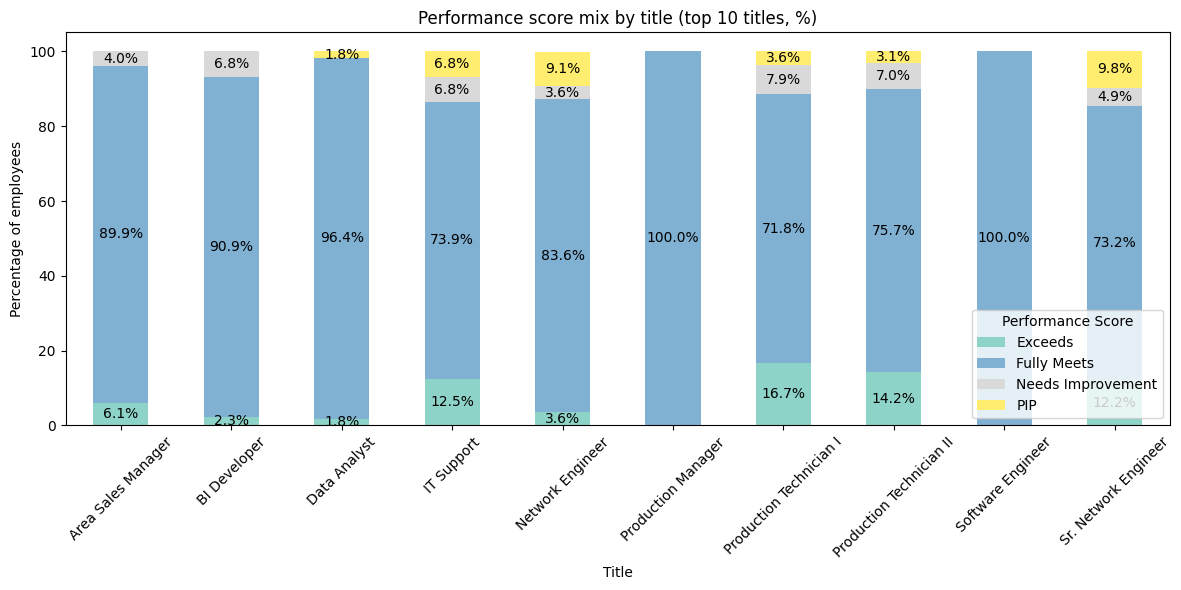

In [114]:
pivot_title_perf = title_perf.pivot(index='Title', columns='Performance Score', values='PercentInTitle')

ax = pivot_title_perf.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Performance score mix by title (top 10 titles, %)')
plt.ylabel('Percentage of employees')
plt.xlabel('Title')
plt.legend(title='Performance Score')
plt.xticks(rotation=45)
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

In [115]:
train_cost_outcome = df.groupby('Training Outcome')['Training Cost'].agg(['count', 'mean', 'median']).round(0)
train_cost_outcome

,count,mean,median
Training Outcome,,,
Completed,737,565.0,573.0
Failed,668,557.0,575.0
Incomplete,731,553.0,568.0
Passed,709,562.0,571.0


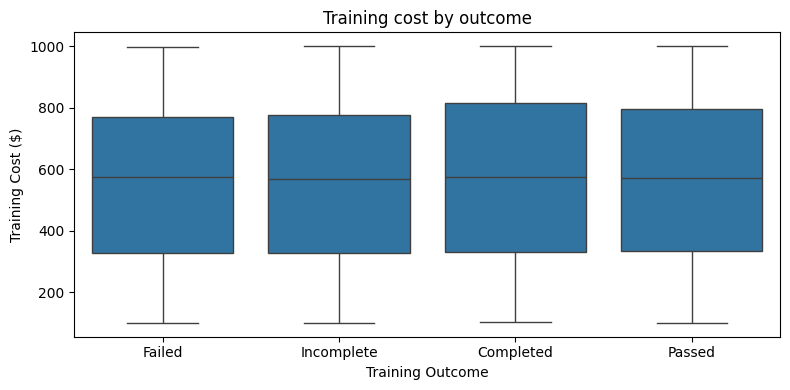

In [116]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Training Outcome', y='Training Cost')
plt.title('Training cost by outcome')
plt.xlabel('Training Outcome')
plt.ylabel('Training Cost ($)')
plt.tight_layout()
plt.show()